## <div style="text-align: center;">LendingClub Risk Analysis
### <div style="text-align: center;">Alec Blevins

<img src="https://www.sec.gov/Archives/edgar/data/1409970/000119312514323136/g766811g90s51.jpg" width="200">

LendingClub is a financial service company specializing in personal loans, business loans, auto loan refinancing, and banking solutions. Founded in 2007, LendingClub has helped over 5 million customers consolidate debt, pay off credit cards, and borrow money for "almost any purpose". 

In this case study, we will be able to analyze accepted and rejected loans ranging from 2007 to 2018, and build two classification models to determine if a loan will be rejected or accepted based on the borrower, and the risk involved with accepting a loan. We will be able to develop a basic understanding of creditworthiness, credit analysis, and financial risk by probabilistically modeling how borrower features relate to defaulted or charged-off loans.

By building a Naïve Bayes Classification model, we can assume conditional independence among a pool of features, allowing us to calculate joint probabilities and calculate the numerical percentage of risk involved with a given loan. This will enable us to predict if an approved loan will be defaulted or charged-off. 

Additionally, we can predict if a loan request will be approved or declined by utilizing a Nearest Neighbor model. In other words, we can predict the creditworthiness and risk associated with a loan application based on our data, and classify whether it will be accepted or rejected. 


Source: LendingClub. “Personal Loan.” LendingClub. https://www.lendingclub.com/personal-loan

Contents: 

- Cover & Importing Our Data
- Part 1: Naïve Bayes Classification for Defaulting and Charged Off Loans
    - Exploratory Data Analysis & Data Scrubbing - Accepted Loans
    - Correlation Analysis
    - Naïve Bayes Classification Implementation
    - Lazy Evaluation
    - K-Fold Cross Validation
    - Part 1: Summary
- Part 2: Nearest Neighbor Algorithm for Accepted & Rejected Loans
    - Exploratory Data Analysis & Data Scrubbing - Rejected Loans
    - Nearest Neighbor Algorithm Implementation
    - K-Fold Cross Validation
    - Part 2: Summary
- Conclusion 

Data source from Nathan George, 2019: https://www.kaggle.com/datasets/wordsforthewise/lending-club?select=accepted_2007_to_2018Q4.csv.gz

Let's import our data: 

In [6]:
import pandas as pd

acc_df = pd.read_csv("accepted_2007_to_2018Q4.csv", low_memory = False)

acc_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
rej_df = pd.read_csv("rejected_2007_to_2018Q4.csv", low_memory = False)

rej_df.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0


## <div style="text-align: center;">Part 1: Naïve Bayes Classification for Defaulting and Charged Off Loans

### <div style="text-align: center;">Exploratory Data Analysis & Data Scrubbing - Accepted Loans

Let's start with the accepted loan dataset. Before our analysis, we need to clean up the data and discard fields holding mostly null values. 

In [13]:
print(acc_df.columns.tolist())

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq',

id                       1.000000
member_id                0.000000
loan_amnt                0.999985
funded_amnt              0.999985
funded_amnt_inv          0.999985
                           ...   
settlement_status        0.015148
settlement_date          0.015148
settlement_amount        0.015148
settlement_percentage    0.015148
settlement_term          0.015148
Length: 151, dtype: float64


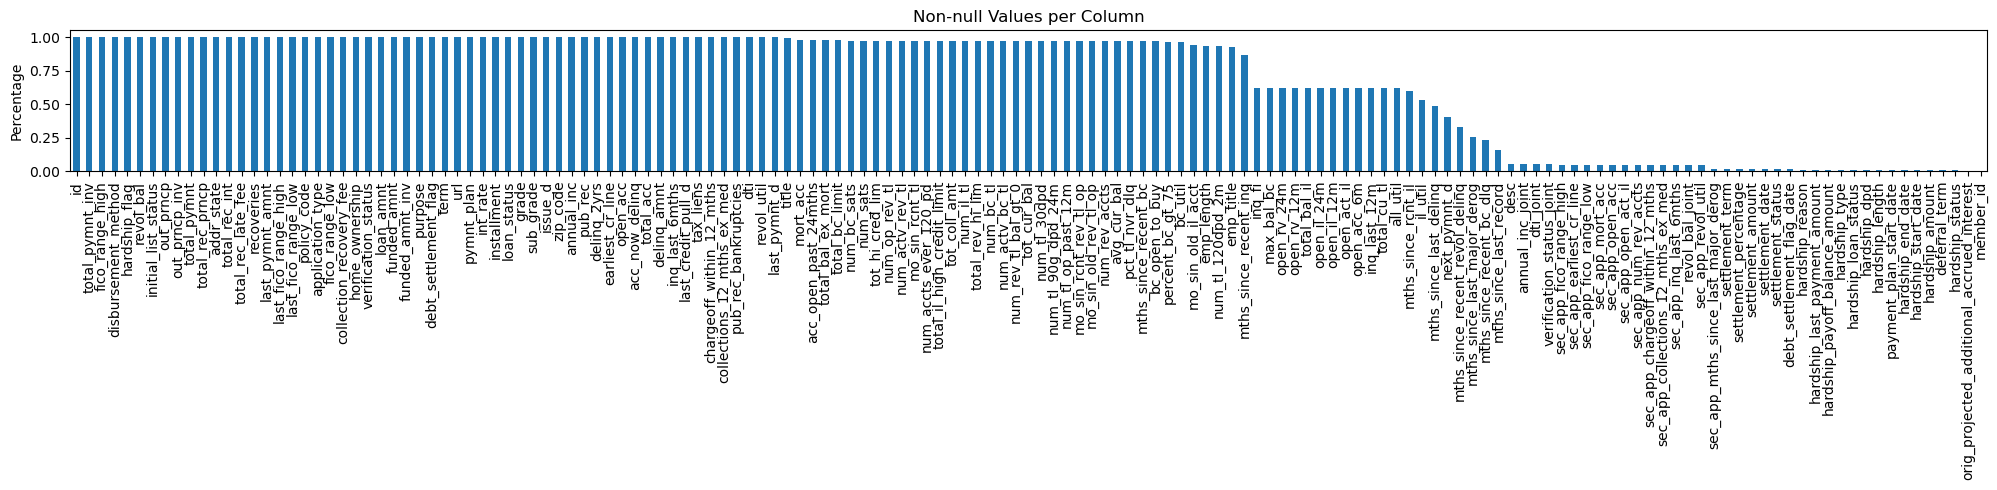

In [15]:
import matplotlib.pyplot as plt

non_null_counts_acc = 1 - acc_df.isnull().mean()
print(non_null_counts_acc)

non_null_counts_acc.sort_values(ascending=False).plot(kind='bar', figsize=(20,5))
plt.title("Non-null Values per Column")
plt.ylabel("Percentage")
plt.tight_layout()
plt.show()

We can immediately take out the fields containing less than 70% data. Notice the jump in the number of null values between "mths_since_recent_inq", with about 10% containing null values, to "inq_fl", with about 35% null values. This will be our cut-off point. 

id                            1.000000
loan_amnt                     0.999985
funded_amnt                   0.999985
funded_amnt_inv               0.999985
term                          0.999985
                                ...   
total_bc_limit                0.977855
total_il_high_credit_limit    0.968899
hardship_flag                 0.999985
disbursement_method           0.999985
debt_settlement_flag          0.999985
Length: 93, dtype: float64
This gives us: 93 fields to choose from.


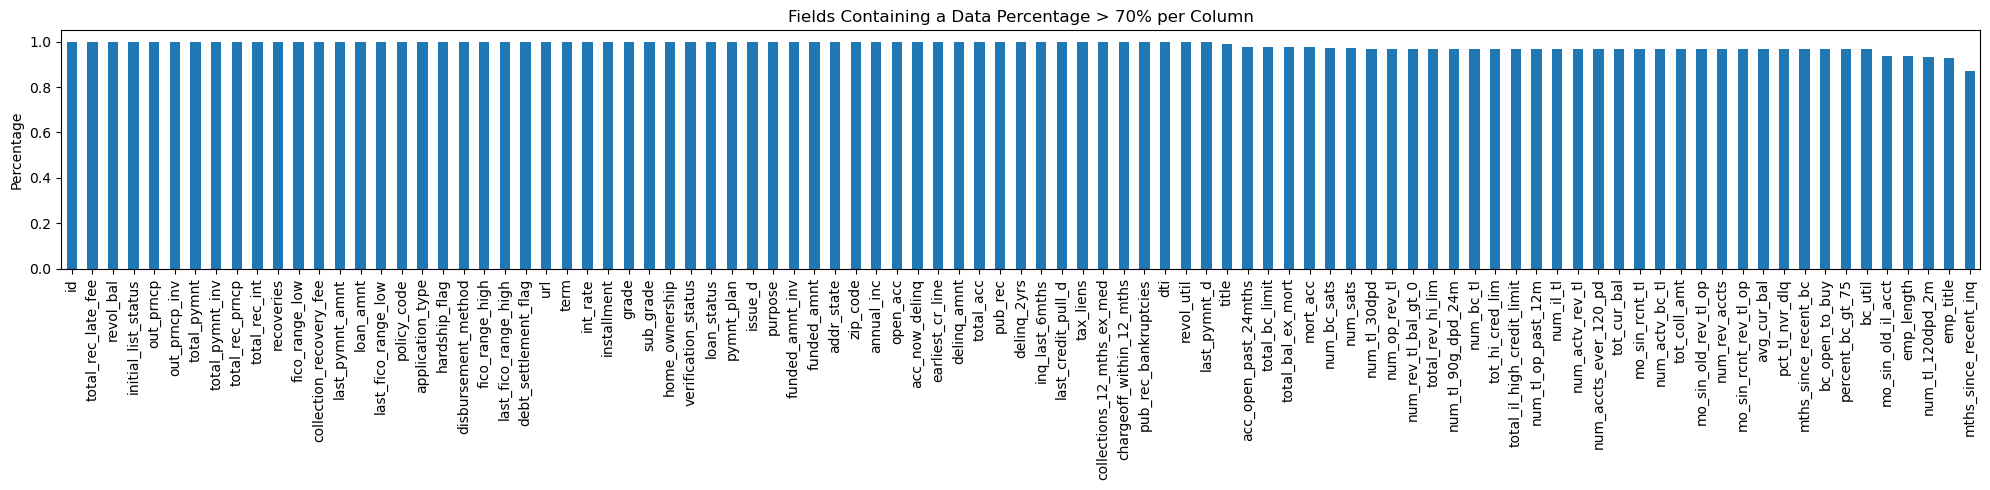

In [18]:
mostly_non_null_acc = non_null_counts_acc[non_null_counts_acc > 0.7]
print(mostly_non_null_acc)
print(f"This gives us:", len(mostly_non_null_acc),"fields to choose from.")

mostly_non_null_acc.sort_values(ascending=False).plot(kind='bar', figsize=(20,5))
plt.title("Fields Containing a Data Percentage > 70% per Column")
plt.ylabel("Percentage")
plt.tight_layout()
plt.show()

Let's create a subset containing this data: 

In [21]:
pre_clean_acc_df = acc_df[mostly_non_null_acc.index]

pre_clean_acc_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,...,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,...,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,...,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
3,66310712,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,...,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,...,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N


Let's define our fields: 

In [24]:
pre_clean_acc_defin = pd.read_csv("lendingclub_column_definitions.csv", low_memory = False)
#Definitions Source: OpenAI. (2025). ChatGPT (April 12 version) [Large language model]. https://openai.com/chatgpt

print(pre_clean_acc_defin.to_string())

                   Column Name                                                                Definition
0                           id                                           Unique identifier for the loan.
1                    loan_amnt                             The amount of money the borrower applied for.
2                  funded_amnt                      The total amount committed to the loan by investors.
3              funded_amnt_inv                           The portion of the loan funded by the investor.
4                         term                           The length of the loan (e.g., 36 or 60 months).
5                     int_rate                                                Interest rate on the loan.
6                  installment                                     Monthly payment owed by the borrower.
7                        grade     Loan grade assigned by the platform (A–G), reflects creditworthiness.
8                    sub_grade                    More 

We can sort out key features associated with loan defaults. For example, "id" and "url" are not useful in this computation.

Let's focus on 5 fields that can generally assess a borrower's loan status. 

When selecting associated variables, consider the 5 C's of credit: 
- Character
- Capacity
- Capital
- Collateral
- Conditions
  
These factors can help lenders determine a borrower's creditworthiness. This will be key when assessing the status of their loan. 

A loan grade is a way to assess the creditworthiness and risk of a borrower. Therefore, "grade" could be a major factor in the prediction of "loan_status". Additionally, the borrower's credit score, debt-to-income ratio, and credit utilization ratio may prove to be associated with loan charge-offs and defaults. 

Sources: 

- Airtel. (2024, June 25). How does loan grading work? Process, factors, significance & challenges. https://www.airtel.in/blog/personal-loan/how-does-loan-grading-work/

- Capital One. (n.d.). What are the 5 C’s of credit? Capital One. https://www.capitalone.com/learn-grow/money-management/five-cs-of-credit/

<img src="https://www.investopedia.com/thmb/sW2OzUcIrqFeZNVNOPuiJ_PwlBw=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/investopedia5cscredit-5c8ffbb846e0fb00016ee129.jpg" width="600">

Graphic: Czinkota, A. / Investopedia. (n.d.). Credit Score Factors Illustration [Image]. Investopedia. https://www.investopedia.com/thmb/sW2OzUcIrqFeZNVNOPuiJ_PwlBw=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/investopedia5cscredit-5c8ffbb846e0fb00016ee129.jpg

Let's investigate the correlation between "loan_status" and:
- "dti" - DTI, or debt-to-income ratio, calculates the percentage of one's gross monthly income over one's debt.
- "grade" -  A classification of creditworthiness. This could include factors such as credit score and debt-to-income ratio, but is also based on income and employment stability, and repayment history.
- "revol_util" - A revolving credit utilization rate, or credit utilization ratio, is the percentage of revolving credit that is currently being used. 
- "fico_range_low" - A borrower's lowest reported FICO credit score during the installment. 
- "percent_bc_gt_75" - The percentage of a borrower's bank cards where the credit utilization is greater than 75%.  
- "annual_inc" and "verification_status" - A borrower's annual income, and if this income is verified. 

The "loan_status" field is our most important field, as it tells us whether a loan is: 
- "Fully Paid" - A loan that was repaid in full.
- "Current" - An active loan is currently up-to-date on all outstanding payments. 
- "Charged Off" - An active loan has been written off as uncollectible to the lender. This usually happens after a series of missed payments.
- "In Grace Period" - When the borrower is temporarily exempt from making payments.
- "Late (31 - 120 days)" and "Late (16-30 days)" - When the borrower has missed a payment.
- "Default" - When a borrower has failed to meet the repayment obligations.

Let's create our primary subset with exculsivly these variables: 

In [87]:
clean_acc_df = pre_clean_acc_df[["loan_status", "grade", "annual_inc", "verification_status", 
"fico_range_low", "dti", "revol_util", "percent_bc_gt_75"]].copy()

clean_acc_df.head()

,loan_status,grade,annual_inc,verification_status,fico_range_low,dti,revol_util,percent_bc_gt_75
0,Fully Paid,C,55000.0,Not Verified,675.0,5.91,29.7,0.0
1,Fully Paid,C,65000.0,Not Verified,715.0,16.06,19.2,7.7
2,Fully Paid,B,63000.0,Not Verified,695.0,10.78,56.2,50.0
3,Current,C,110000.0,Source Verified,785.0,17.06,11.6,0.0
4,Fully Paid,F,104433.0,Source Verified,695.0,25.37,64.5,60.0


Firstly, let's clean up our "loan_status" variable:

In [90]:
unique_loan_status = clean_acc_df['loan_status'].unique()
print(unique_loan_status)

unique_loan_status_counts = clean_acc_df['loan_status'].value_counts()
print(unique_loan_status_counts)

['Fully Paid' 'Current' 'Charged Off' 'In Grace Period'
 'Late (31-120 days)' 'Late (16-30 days)' 'Default' nan
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']
loan_status
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: count, dtype: int64


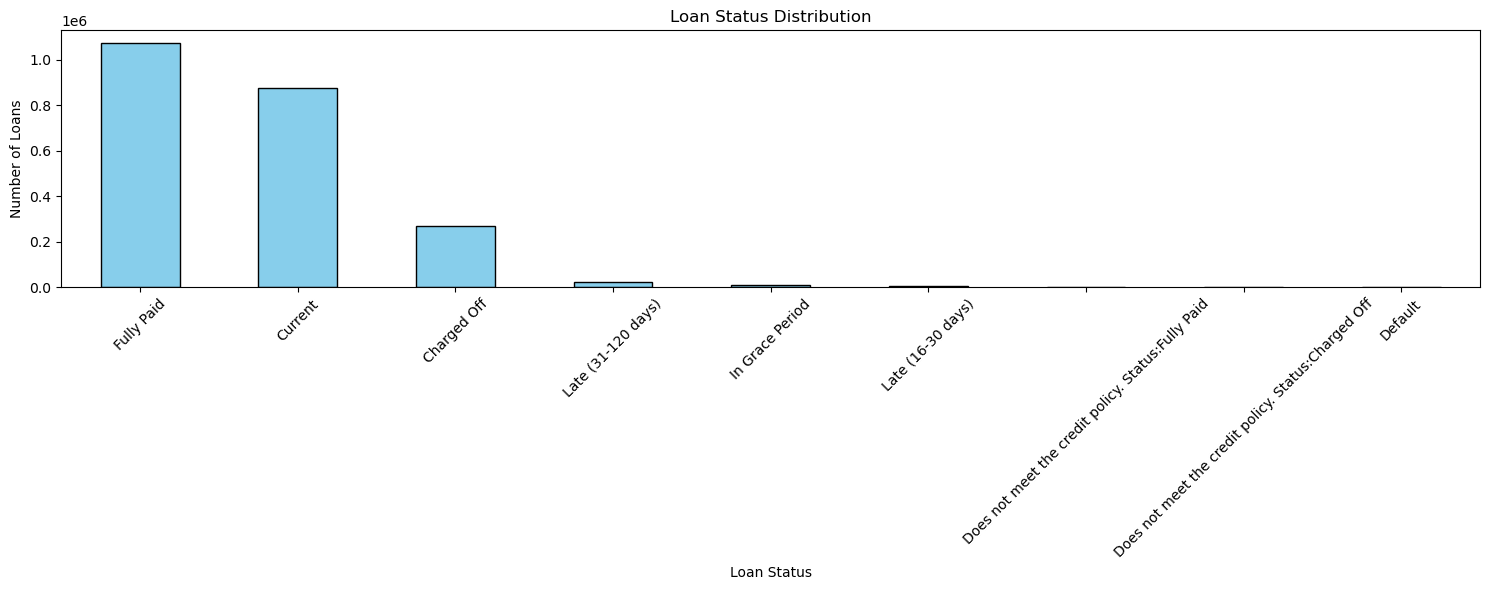

In [92]:
loan_status_counts = clean_acc_df['loan_status'].value_counts()

plt.figure(figsize=(15, 6))
loan_status_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

#Help with library usage: OpenAI. (2025). ChatGPT (GPT-4 model). OpenAI. https://openai.com/chatgpt

Notice how we also have "Does not meet the credit policy. Status:Fully Paid" and "Does not meet the credit policy. Status:Charged Off". We will classify these as "Fully Paid" and "Charged Off" respectively.

We will also pool "Late (31-120 days)" and "Late (16-30 days)" as "Late". 

Therefore, we have: 
1. Fully Paid
2. Current
3. Late
4. In Grace Period 
5. Default / Charged Off

In [96]:
clean_acc_df.loc[:, 'loan_status'] = clean_acc_df['loan_status'].replace({
    'Late (16-30 days)': 'Late',
    'Late (31-120 days)': 'Late',
    'Charged Off': 'Default / Charged Off',
    'Default': 'Default / Charged Off',
    'Does not meet the credit policy. Status:Fully Paid': 'Fully Paid',
    'Does not meet the credit policy. Status:Charged Off': 'Default / Charged Off'})

clean_acc_df.head()

,loan_status,grade,annual_inc,verification_status,fico_range_low,dti,revol_util,percent_bc_gt_75
0,Fully Paid,C,55000.0,Not Verified,675.0,5.91,29.7,0.0
1,Fully Paid,C,65000.0,Not Verified,715.0,16.06,19.2,7.7
2,Fully Paid,B,63000.0,Not Verified,695.0,10.78,56.2,50.0
3,Current,C,110000.0,Source Verified,785.0,17.06,11.6,0.0
4,Fully Paid,F,104433.0,Source Verified,695.0,25.37,64.5,60.0


Next, let's group "annual_inc" into bins, so we can generalize our data. For example, an income of 104,433 will be classified in the 100,000 - 110,000 bin. We will perform our computations on "income_group" rather than "annual_inc". 

Note that the grouping will include the rightmost value. In other words, the bin [50000, 60000] = 50,000 < income ≤ 60,0000

In [99]:
import numpy as np


inc_bins = list(range(0, 200000, 10000)) + [np.inf] #10,000 per bin, up to 200,000, then inf. 
clean_acc_df['income_group'] = pd.cut(clean_acc_df['annual_inc'], bins=inc_bins, right=True, include_lowest=True) #Make sure to include 0

sorted([x for x in clean_acc_df['income_group'].unique().tolist() if pd.notnull(x)]) #Bypass null values - we'll get rid of those later. 


[Interval(-0.001, 10000.0, closed='right'),
 Interval(10000.0, 20000.0, closed='right'),
 Interval(20000.0, 30000.0, closed='right'),
 Interval(30000.0, 40000.0, closed='right'),
 Interval(40000.0, 50000.0, closed='right'),
 Interval(50000.0, 60000.0, closed='right'),
 Interval(60000.0, 70000.0, closed='right'),
 Interval(70000.0, 80000.0, closed='right'),
 Interval(80000.0, 90000.0, closed='right'),
 Interval(90000.0, 100000.0, closed='right'),
 Interval(100000.0, 110000.0, closed='right'),
 Interval(110000.0, 120000.0, closed='right'),
 Interval(120000.0, 130000.0, closed='right'),
 Interval(130000.0, 140000.0, closed='right'),
 Interval(140000.0, 150000.0, closed='right'),
 Interval(150000.0, 160000.0, closed='right'),
 Interval(160000.0, 170000.0, closed='right'),
 Interval(170000.0, 180000.0, closed='right'),
 Interval(180000.0, 190000.0, closed='right'),
 Interval(190000.0, inf, closed='right')]

In [101]:
clean_acc_df.head()

,loan_status,grade,annual_inc,verification_status,fico_range_low,dti,revol_util,percent_bc_gt_75,income_group
0,Fully Paid,C,55000.0,Not Verified,675.0,5.91,29.7,0.0,"(50000.0, 60000.0]"
1,Fully Paid,C,65000.0,Not Verified,715.0,16.06,19.2,7.7,"(60000.0, 70000.0]"
2,Fully Paid,B,63000.0,Not Verified,695.0,10.78,56.2,50.0,"(60000.0, 70000.0]"
3,Current,C,110000.0,Source Verified,785.0,17.06,11.6,0.0,"(100000.0, 110000.0]"
4,Fully Paid,F,104433.0,Source Verified,695.0,25.37,64.5,60.0,"(100000.0, 110000.0]"


Let's investigate the number of loans in each income group, and it's relation to verificaiton status:

C:\Users\alecp\AppData\Local\Temp\ipykernel_19828\3910351006.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  inc_ver_grouped = clean_acc_df.groupby(['income_group', 'verification_status']).size().unstack(fill_value=0)


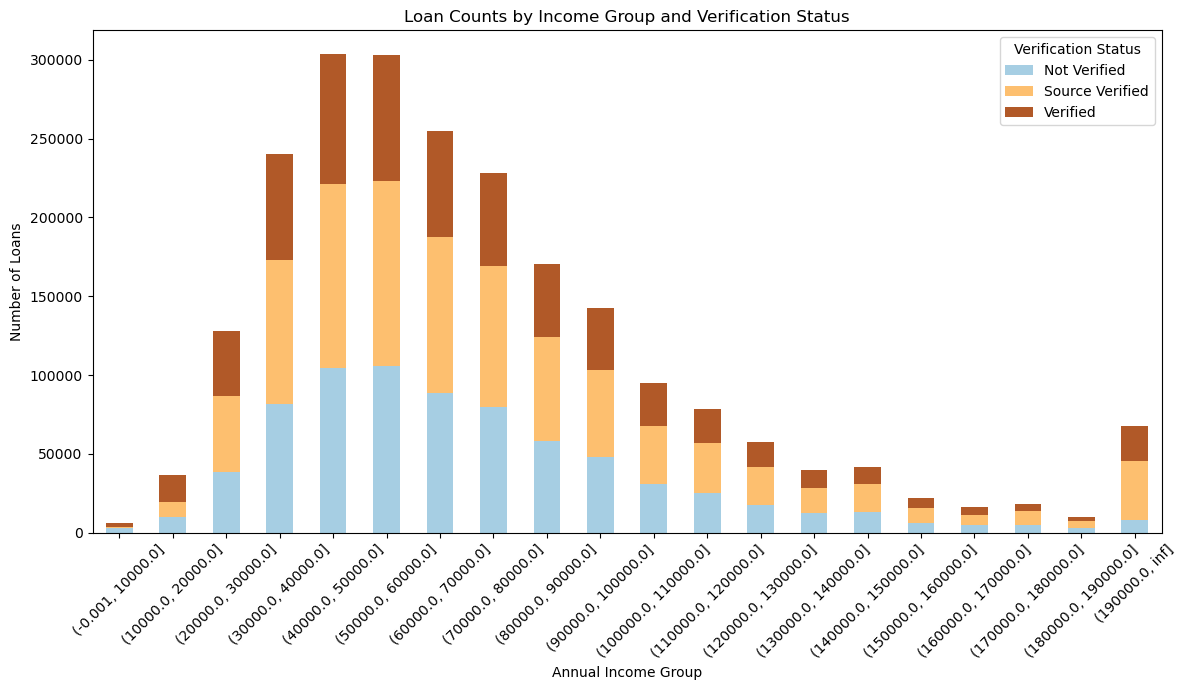

In [104]:
inc_ver_grouped = clean_acc_df.groupby(['income_group', 'verification_status']).size().unstack(fill_value=0)


inc_ver_grouped.plot(kind='bar', stacked=True, figsize=(12,7), colormap='Paired')

plt.title('Loan Counts by Income Group and Verification Status')
plt.xlabel('Annual Income Group')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.legend(title='Verification Status')
plt.tight_layout()
plt.show()

#Help with library usage and grouping: OpenAI. (2025). ChatGPT (GPT-4 model). OpenAI. https://openai.com/chatgpt

Repeating the same process for "verification_status":

- "Not Verified" - The borrower's income was stated but not verified by the lender.
- "Verified" - The borrower's income was verified. 
- "Source Verified" - Income was verified directly from the source. 

For our computation, we can generalize and classify "Source Verified" as "Verified". 

Sources: LendingClub. (n.d.). About income verification. LendingClub. https://www.lendingclub.com/public/income-verification.action

In [107]:
clean_acc_df['verification_status'].value_counts()

verification_status
Source Verified    886231
Not Verified       744806
Verified           629631
Name: count, dtype: int64

In [109]:
clean_acc_df.loc[:, 'verification_status'] = clean_acc_df['verification_status'].replace({
    'Source Verified': 'Verified'})

clean_acc_df.head()

,loan_status,grade,annual_inc,verification_status,fico_range_low,dti,revol_util,percent_bc_gt_75,income_group
0,Fully Paid,C,55000.0,Not Verified,675.0,5.91,29.7,0.0,"(50000.0, 60000.0]"
1,Fully Paid,C,65000.0,Not Verified,715.0,16.06,19.2,7.7,"(60000.0, 70000.0]"
2,Fully Paid,B,63000.0,Not Verified,695.0,10.78,56.2,50.0,"(60000.0, 70000.0]"
3,Current,C,110000.0,Verified,785.0,17.06,11.6,0.0,"(100000.0, 110000.0]"
4,Fully Paid,F,104433.0,Verified,695.0,25.37,64.5,60.0,"(100000.0, 110000.0]"


Let's visualize the relationship between a defaulted or charged-off loan and verification status: 

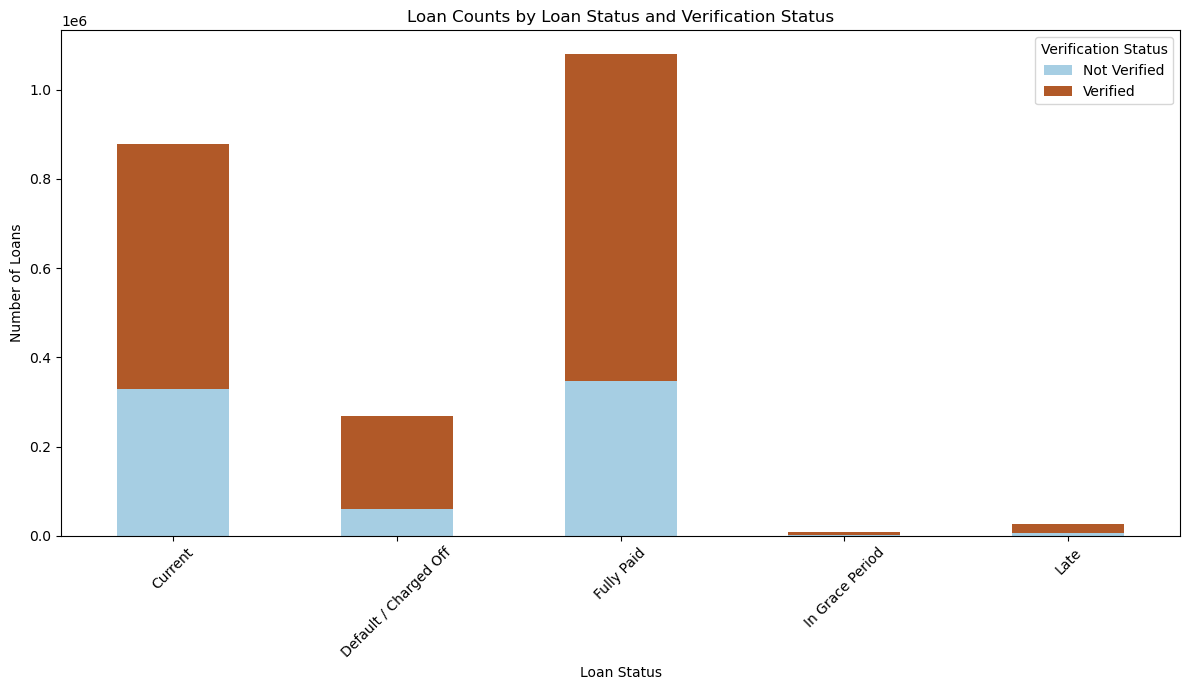

In [112]:
ver_loan_grouped = clean_acc_df.groupby(['loan_status', 'verification_status']).size().unstack(fill_value=0)


ver_loan_grouped.plot(kind='bar', stacked=True, figsize=(12,7), colormap='Paired')

plt.title('Loan Counts by Loan Status and Verification Status')
plt.xlabel('Loan Status')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.legend(title='Verification Status')
plt.tight_layout()
plt.show()

Similarly, we should also group "dti" into bins. Following the same process, a bin will group every 10%. Like before, the bins will include the rightmost value. 

In [115]:
dti_bins = list(range(0, 60, 5)) + [np.inf] # 0-10%, 10%-20%, up to 60%, then inf
clean_acc_df['dti_group'] = pd.cut(clean_acc_df['dti'], bins=dti_bins, right=True, include_lowest=True) #Make sure to include 0


sorted([x for x in clean_acc_df['dti_group'].unique().tolist() if pd.notnull(x)]) #Also skip nulls for now, they will be taken out later

[Interval(-0.001, 5.0, closed='right'),
 Interval(5.0, 10.0, closed='right'),
 Interval(10.0, 15.0, closed='right'),
 Interval(15.0, 20.0, closed='right'),
 Interval(20.0, 25.0, closed='right'),
 Interval(25.0, 30.0, closed='right'),
 Interval(30.0, 35.0, closed='right'),
 Interval(35.0, 40.0, closed='right'),
 Interval(40.0, 45.0, closed='right'),
 Interval(45.0, 50.0, closed='right'),
 Interval(50.0, 55.0, closed='right'),
 Interval(55.0, inf, closed='right')]

Let's visualize the relationship between the number of loans in each DTI group, and their associated loan status:

C:\Users\alecp\AppData\Local\Temp\ipykernel_19828\1734615410.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  DTI_loan_grouped = clean_acc_df.groupby(['dti_group','loan_status']).size().unstack(fill_value=0)


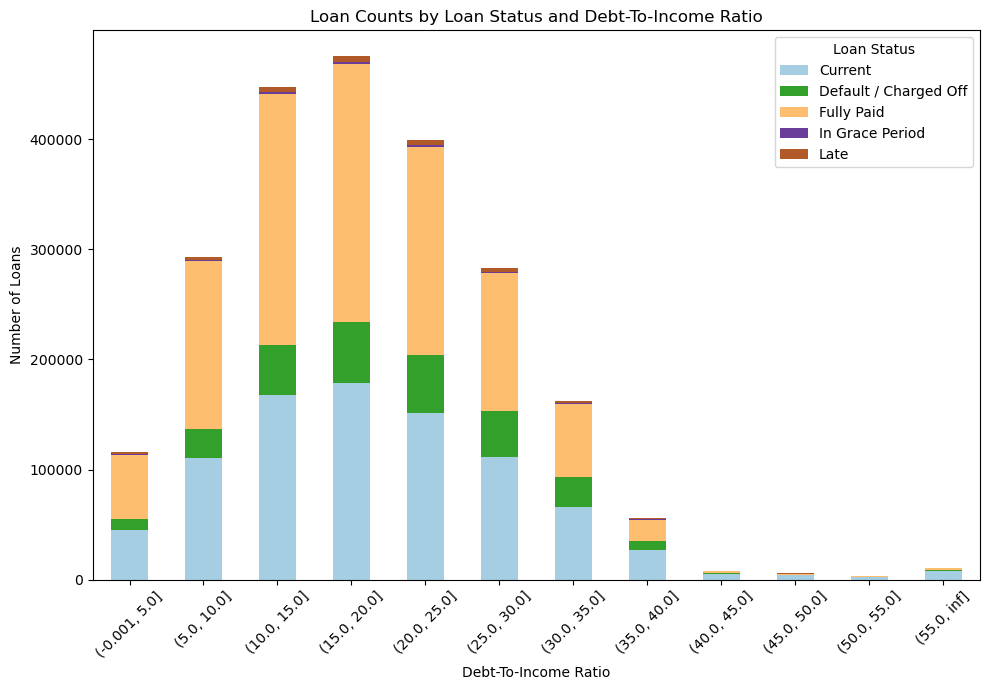

In [118]:
DTI_loan_grouped = clean_acc_df.groupby(['dti_group','loan_status']).size().unstack(fill_value=0)


DTI_loan_grouped.plot(kind='bar', stacked=True, figsize=(10,7), colormap='Paired')

plt.title('Loan Counts by Loan Status and Debt-To-Income Ratio')
plt.xlabel('Debt-To-Income Ratio')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

We will also group the Credit Utilization Ratio:

In [121]:
util_bins = list(range(0, 105, 5)) + [np.inf] # 0-10%, 10%-20%, up to 100%, then inf
clean_acc_df['revol_util_group'] = pd.cut(clean_acc_df['revol_util'], bins=util_bins, right=True, include_lowest=True) #Make sure to include 0


sorted([x for x in clean_acc_df['revol_util_group'].unique().tolist() if pd.notnull(x)]) #Also skip nulls for now, they will be taken out later

[Interval(-0.001, 5.0, closed='right'),
 Interval(5.0, 10.0, closed='right'),
 Interval(10.0, 15.0, closed='right'),
 Interval(15.0, 20.0, closed='right'),
 Interval(20.0, 25.0, closed='right'),
 Interval(25.0, 30.0, closed='right'),
 Interval(30.0, 35.0, closed='right'),
 Interval(35.0, 40.0, closed='right'),
 Interval(40.0, 45.0, closed='right'),
 Interval(45.0, 50.0, closed='right'),
 Interval(50.0, 55.0, closed='right'),
 Interval(55.0, 60.0, closed='right'),
 Interval(60.0, 65.0, closed='right'),
 Interval(65.0, 70.0, closed='right'),
 Interval(70.0, 75.0, closed='right'),
 Interval(75.0, 80.0, closed='right'),
 Interval(80.0, 85.0, closed='right'),
 Interval(85.0, 90.0, closed='right'),
 Interval(90.0, 95.0, closed='right'),
 Interval(95.0, 100.0, closed='right'),
 Interval(100.0, inf, closed='right')]

Let's visualize the relationship between the number of loans in each Credit Utilization Ratio group, and their associated loan status:

C:\Users\alecp\AppData\Local\Temp\ipykernel_19828\2785551795.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  util_loan_grouped = clean_acc_df.groupby(['revol_util_group','loan_status']).size().unstack(fill_value=0)


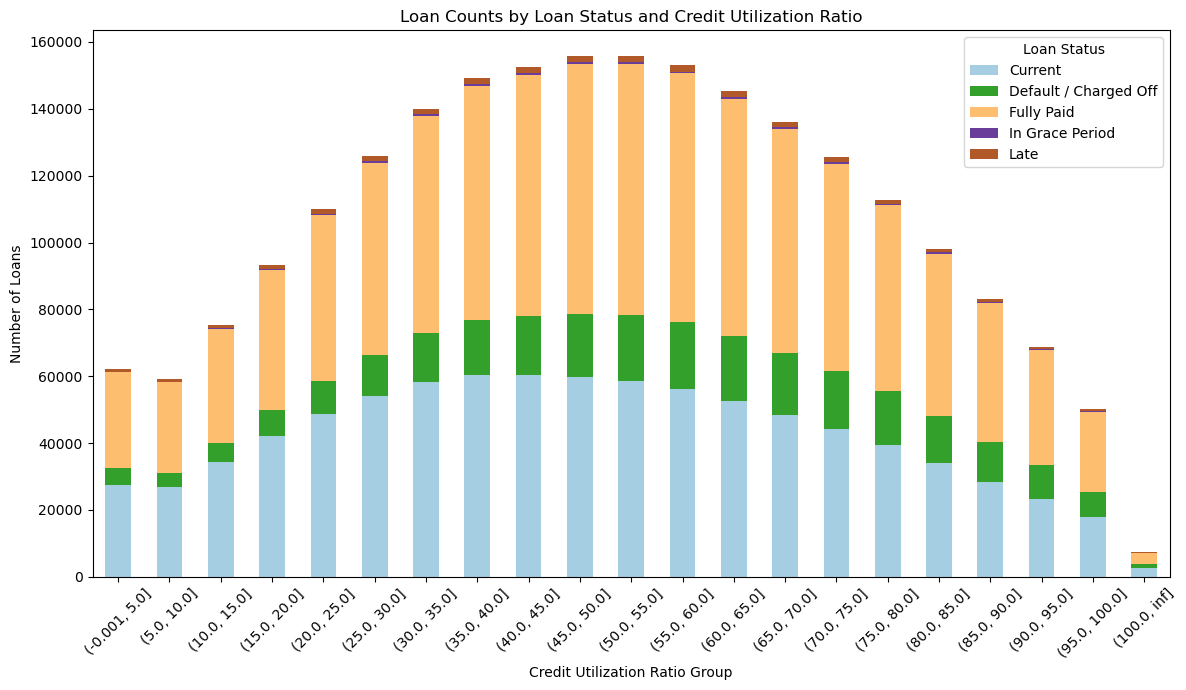

In [124]:
util_loan_grouped = clean_acc_df.groupby(['revol_util_group','loan_status']).size().unstack(fill_value=0)


util_loan_grouped.plot(kind='bar', stacked=True, figsize=(12,7), colormap='Paired')

plt.title('Loan Counts by Loan Status and Credit Utilization Ratio')
plt.xlabel('Credit Utilization Ratio Group')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

The percentage of a borrower's bank cards where the credit utilization is greater than 75% will also be grouped:

In [127]:
bc_gt_bins = list(range(0, 105, 5)) + [np.inf] # 0-10%, 10%-20%, up to 100%, then inf
clean_acc_df['bc_gt_75_group'] = pd.cut(clean_acc_df['percent_bc_gt_75'], bins=bc_gt_bins, right=True, include_lowest=True) #Make sure to include 0


sorted([x for x in clean_acc_df['bc_gt_75_group'].unique().tolist() if pd.notnull(x)]) #Also skip nulls for now, they will be taken out later

[Interval(-0.001, 5.0, closed='right'),
 Interval(5.0, 10.0, closed='right'),
 Interval(10.0, 15.0, closed='right'),
 Interval(15.0, 20.0, closed='right'),
 Interval(20.0, 25.0, closed='right'),
 Interval(25.0, 30.0, closed='right'),
 Interval(30.0, 35.0, closed='right'),
 Interval(35.0, 40.0, closed='right'),
 Interval(40.0, 45.0, closed='right'),
 Interval(45.0, 50.0, closed='right'),
 Interval(50.0, 55.0, closed='right'),
 Interval(55.0, 60.0, closed='right'),
 Interval(60.0, 65.0, closed='right'),
 Interval(65.0, 70.0, closed='right'),
 Interval(70.0, 75.0, closed='right'),
 Interval(75.0, 80.0, closed='right'),
 Interval(80.0, 85.0, closed='right'),
 Interval(85.0, 90.0, closed='right'),
 Interval(90.0, 95.0, closed='right'),
 Interval(95.0, 100.0, closed='right')]

Let's visualize the relationship between the number of loans in each group, and their associated loan status:

C:\Users\alecp\AppData\Local\Temp\ipykernel_19828\1187233783.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  util_loan_grouped = clean_acc_df.groupby(['bc_gt_75_group','loan_status']).size().unstack(fill_value=0)


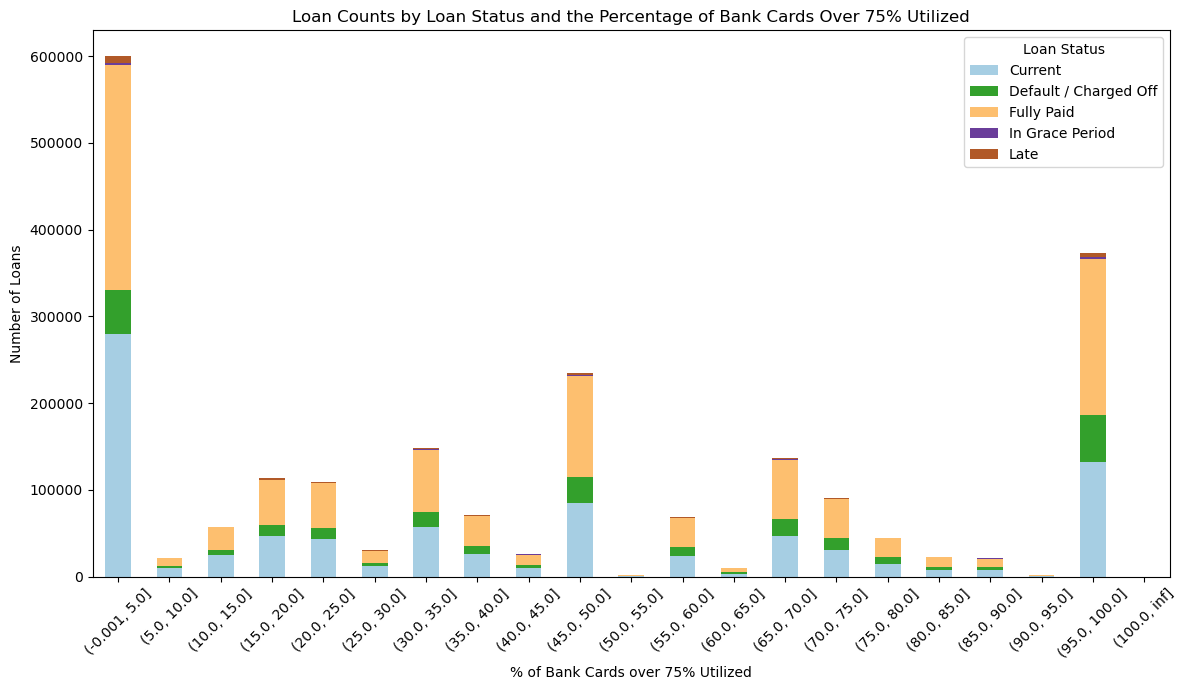

In [131]:
util_loan_grouped = clean_acc_df.groupby(['bc_gt_75_group','loan_status']).size().unstack(fill_value=0)


util_loan_grouped.plot(kind='bar', stacked=True, figsize=(12,7), colormap='Paired')

plt.title('Loan Counts by Loan Status and the Percentage of Bank Cards Over 75% Utilized')
plt.xlabel('% of Bank Cards over 75% Utilized')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

Let's also visualize the relationship between the number of loans in each group, and their associated average Credit Uilization Ratio:

C:\Users\alecp\AppData\Local\Temp\ipykernel_19828\1698662735.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bc_util_avg = clean_acc_df.groupby('bc_gt_75_group')['revol_util'].mean() #Help with library usage: OpenAI. (2025). ChatGPT (GPT-4 model). OpenAI. https://openai.com/chatgpt


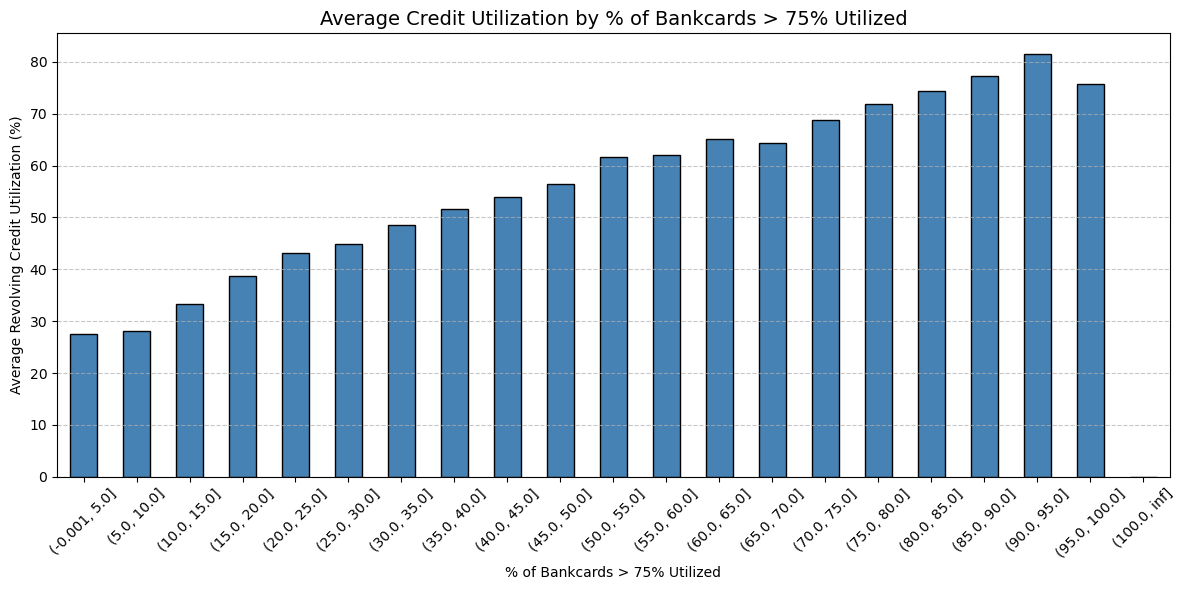

In [134]:
bc_util_avg = clean_acc_df.groupby('bc_gt_75_group')['revol_util'].mean() #Help with library usage: OpenAI. (2025). ChatGPT (GPT-4 model). OpenAI. https://openai.com/chatgpt


plt.figure(figsize=(12, 6))
bc_util_avg.plot(kind='bar', color='steelblue', edgecolor='black')

plt.title('Average Credit Utilization by % of Bankcards > 75% Utilized', fontsize=14)
plt.ylabel('Average Revolving Credit Utilization (%)')
plt.xlabel('% of Bankcards > 75% Utilized')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Finally, taking out the null values: 

In [137]:
clean_acc_df.isnull().sum() #Lets hope all of these null values fall under the same loans

loan_status               33
grade                     33
annual_inc                37
verification_status       33
fico_range_low            33
dti                     1744
revol_util              1835
percent_bc_gt_75       75412
income_group              37
dti_group               1746
revol_util_group        1835
bc_gt_75_group         75412
dtype: int64

In [139]:
rows_with_null_acc = clean_acc_df.isnull().any(axis = 1).sum()
print(f"There are:", rows_with_null_acc, "loans that contain one or more null values in our cleaned dataset.")
print(f"This is: ", (rows_with_null_acc / len(clean_acc_df) * 100).round(2), "% of our data.")

There are: 77304 loans that contain one or more null values in our cleaned dataset.
This is:  3.42 % of our data.


In [141]:
clean_acc_df.dropna(inplace=True)
clean_acc_df.isnull().sum()

loan_status            0
grade                  0
annual_inc             0
verification_status    0
fico_range_low         0
dti                    0
revol_util             0
percent_bc_gt_75       0
income_group           0
dti_group              0
revol_util_group       0
bc_gt_75_group         0
dtype: int64

In [143]:
clean_acc_df.head()

,loan_status,grade,annual_inc,verification_status,fico_range_low,dti,revol_util,percent_bc_gt_75,income_group,dti_group,revol_util_group,bc_gt_75_group
0,Fully Paid,C,55000.0,Not Verified,675.0,5.91,29.7,0.0,"(50000.0, 60000.0]","(5.0, 10.0]","(25.0, 30.0]","(-0.001, 5.0]"
1,Fully Paid,C,65000.0,Not Verified,715.0,16.06,19.2,7.7,"(60000.0, 70000.0]","(15.0, 20.0]","(15.0, 20.0]","(5.0, 10.0]"
2,Fully Paid,B,63000.0,Not Verified,695.0,10.78,56.2,50.0,"(60000.0, 70000.0]","(10.0, 15.0]","(55.0, 60.0]","(45.0, 50.0]"
3,Current,C,110000.0,Verified,785.0,17.06,11.6,0.0,"(100000.0, 110000.0]","(15.0, 20.0]","(10.0, 15.0]","(-0.001, 5.0]"
4,Fully Paid,F,104433.0,Verified,695.0,25.37,64.5,60.0,"(100000.0, 110000.0]","(25.0, 30.0]","(60.0, 65.0]","(55.0, 60.0]"


### <div style="text-align: center;">Correlation Analysis

To determine the relationships between these variables, we can perform a correlation analysis. 

Let's create a subset of our cleaned data converted to integer datatypes. However, for this analysis, we will use "annual_inc" instead of "income_group". 

Starting with "loan_status":

0. "Fully Paid / Current / Late / In Grace Period"
1. "Default / Charged Off"

In [147]:
int_clean_acc_df = clean_acc_df[["loan_status", "grade", "annual_inc", "verification_status", 
"fico_range_low", "dti", "revol_util", "percent_bc_gt_75"]].copy()

int_clean_acc_df.loc[:, 'loan_status'] = int_clean_acc_df['loan_status'].replace({
    'Fully Paid': 0,
    'Current': 0,
    'Late' : 0,
    'In Grace Period': 0, 
    'Default / Charged Off': 1})
    
int_clean_acc_df.head()

C:\Users\alecp\AppData\Local\Temp\ipykernel_19828\1427487627.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  int_clean_acc_df.loc[:, 'loan_status'] = int_clean_acc_df['loan_status'].replace({


,loan_status,grade,annual_inc,verification_status,fico_range_low,dti,revol_util,percent_bc_gt_75
0,0,C,55000.0,Not Verified,675.0,5.91,29.7,0.0
1,0,C,65000.0,Not Verified,715.0,16.06,19.2,7.7
2,0,B,63000.0,Not Verified,695.0,10.78,56.2,50.0
3,0,C,110000.0,Verified,785.0,17.06,11.6,0.0
4,0,F,104433.0,Verified,695.0,25.37,64.5,60.0


In [149]:
int_clean_acc_df['loan_status'].unique()

array([0, 1], dtype=object)

In order to perform a correlation analysis between these variables, let's also convert the "grade" variable to integers:

1. "A" - Lowest expected risk of loss, generally resulting in the lowest interest rate
2. "B"
3. "C"
4. "D"
5. "E"
6. "F"
7. "G" - Highest expected risk of loss, generally resulting in the highest interest rate

In [152]:
unique_grade = int_clean_acc_df['grade'].unique()
print(unique_grade)

unique_grade_counts = int_clean_acc_df['grade'].value_counts()
print(unique_grade_counts)

['C' 'B' 'F' 'A' 'E' 'D' 'G']
grade
B    641896
C    631400
A    417676
D    312092
E    129426
F     39552
G     11355
Name: count, dtype: int64


In [154]:
int_clean_acc_df.loc[:, 'grade'] = int_clean_acc_df['grade'].replace({
    'A': 1,
    'B': 2,
    'C' : 3,
    'D': 4, 
    'E': 5,
    'F': 6, 
    'G': 7})

int_clean_acc_df.head()

C:\Users\alecp\AppData\Local\Temp\ipykernel_19828\1688527281.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  int_clean_acc_df.loc[:, 'grade'] = int_clean_acc_df['grade'].replace({


,loan_status,grade,annual_inc,verification_status,fico_range_low,dti,revol_util,percent_bc_gt_75
0,0,3,55000.0,Not Verified,675.0,5.91,29.7,0.0
1,0,3,65000.0,Not Verified,715.0,16.06,19.2,7.7
2,0,2,63000.0,Not Verified,695.0,10.78,56.2,50.0
3,0,3,110000.0,Verified,785.0,17.06,11.6,0.0
4,0,6,104433.0,Verified,695.0,25.37,64.5,60.0


In [155]:
int_clean_acc_df['grade'].unique()

array([3, 2, 6, 1, 5, 4, 7], dtype=object)

Finally, we can convert "verification_status" to binary for our correlation analysis. 

In [159]:
int_clean_acc_df.loc[:, 'verification_status'] = int_clean_acc_df['verification_status'].replace({
    'Not Verified': 0,
    'Verified': 1})

int_clean_acc_df.head()

C:\Users\alecp\AppData\Local\Temp\ipykernel_19828\1927173512.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  int_clean_acc_df.loc[:, 'verification_status'] = int_clean_acc_df['verification_status'].replace({


,loan_status,grade,annual_inc,verification_status,fico_range_low,dti,revol_util,percent_bc_gt_75
0,0,3,55000.0,0,675.0,5.91,29.7,0.0
1,0,3,65000.0,0,715.0,16.06,19.2,7.7
2,0,2,63000.0,0,695.0,10.78,56.2,50.0
3,0,3,110000.0,1,785.0,17.06,11.6,0.0
4,0,6,104433.0,1,695.0,25.37,64.5,60.0


In [161]:
int_clean_acc_df['verification_status'].unique()

array([0, 1], dtype=object)

Let's compute a Pearson Correlation using Pandas' corr(). 

Sources: 

- GeeksforGeeks. (n.d.). Python | Pandas DataFrame.corr(). GeeksforGeeks. https://www.geeksforgeeks.org/python-pandas-dataframe-corr/

- ScienceDirect. (n.d.). Pearson correlation. In ScienceDirect Topics. https://www.sciencedirect.com/topics/computer-science/pearson-correlation

In [164]:
int_clean_acc_df.corr()

,loan_status,grade,annual_inc,verification_status,fico_range_low,dti,revol_util,percent_bc_gt_75
loan_status,1.000000,0.224028,-0.024717,0.085433,-0.120905,0.035595,0.065142,0.076406
grade,0.224028,1.000000,-0.049954,0.217444,-0.415632,0.119853,0.265610,0.277062
annual_inc,-0.024717,-0.049954,1.000000,0.031895,0.037937,-0.083163,0.028281,-0.003194
verification_status,0.085433,0.217444,0.031895,1.000000,-0.175785,0.024377,0.125914,0.116347
fico_range_low,-0.120905,-0.415632,0.037937,-0.175785,1.000000,-0.022651,-0.479067,-0.421841
dti,0.035595,0.119853,-0.083163,0.024377,-0.022651,1.000000,0.113890,0.104020
revol_util,0.065142,0.265610,0.028281,0.125914,-0.479067,0.113890,1.000000,0.739606
percent_bc_gt_75,0.076406,0.277062,-0.003194,0.116347,-0.421841,0.104020,0.739606,1.000000


<Axes: >

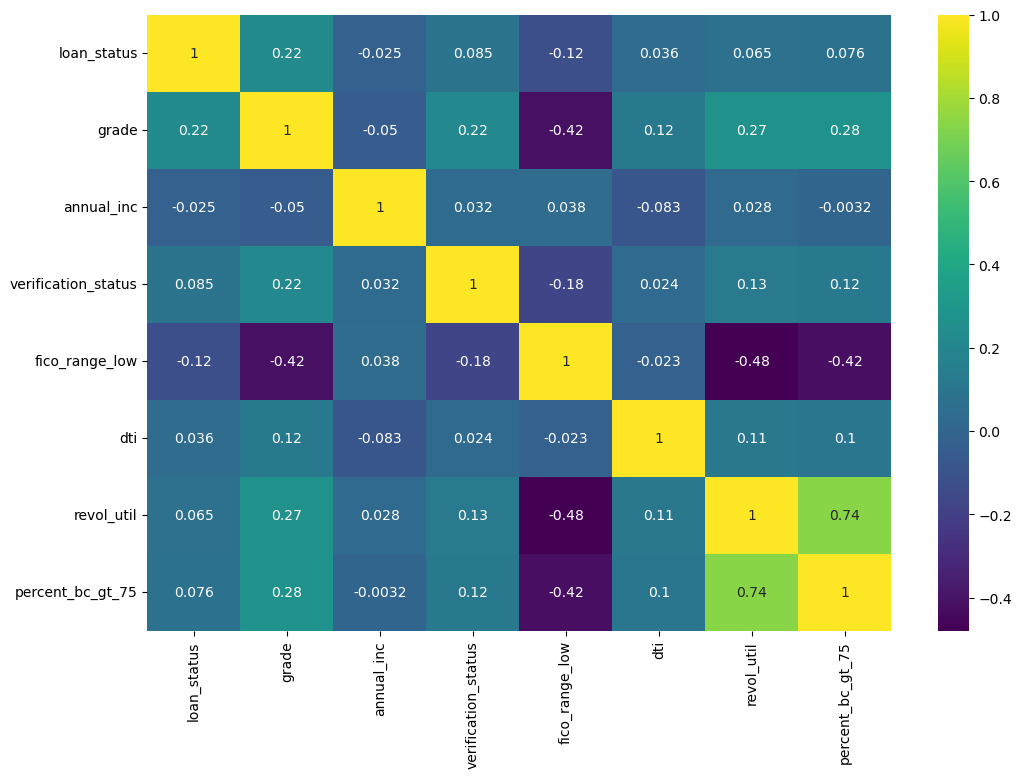

In [166]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(int_clean_acc_df.corr(), annot=True, cmap='viridis')

It can be seen that this Pearson Correlation model is not very helpful for our data, as a Pearson Correlation typically uses two continuous variables that hold a normal distribution, have independence of observations, and have a linear relationship. 

In our clean dataset, we are working with continuous and categorical variables, and our data may not hold a linear relationship, making a Pearson Correlation a less suitable method. 

Instead, let's use a Point-Biserial Correlation model. With a binary variable such as "loan_status" (Default / Charged off vs Not), and continuous variables "annual_inc", "fico_range_low", "dti", "revol_util", and "percent_bc_gt_75", a Point_Biserial Correlation will do a better job at modeling correlation. However, we are now excluding "grade" and "verification_status". 

Source: Bobbitt, Z. (2020, July 24). How to Calculate Point-Biserial Correlation in Python. Statology. Retrieved from https://www.statology.org/point-biserial-correlation-python/

In [170]:
from scipy.stats import pointbiserialr


continuous_var = ['annual_inc', 'fico_range_low', 'dti', 'revol_util', 'percent_bc_gt_75']
point_biserial_results = {}
point_biserial_corr = {}

#Loop through each variable and compute point-biserial correlation
for var in continuous_var:
    correlation, p_val = pointbiserialr(int_clean_acc_df['loan_status'], int_clean_acc_df[var])
    point_biserial_results[var] = {'correlation': correlation, 'p-value': p_val}
    point_biserial_corr[var] = {'correlation': correlation}


point_biserial_acc_df = pd.DataFrame(point_biserial_results).T
print(point_biserial_acc_df)

#Help with library usage: OpenAI. (2025). ChatGPT (GPT-4 model). OpenAI. https://openai.com/chatgpt

                  correlation        p-value
annual_inc          -0.024717  4.009352e-292
fico_range_low      -0.120905   0.000000e+00
dti                  0.035595   0.000000e+00
revol_util           0.065142   0.000000e+00
percent_bc_gt_75     0.076406   0.000000e+00


Once again, our correlation method proved not to help determine the correlation between "loan_status" and our other features. It is clear that this is due to the non-linear relationship our variables hold. 

In a final attempt, we can try to measure the dependence between our variables through a Mutual Information model. This will be a great alternative to our Pearson Correlation model, as a Mutual Information model measures any type of relationship between variables, not just linear. In other words, we are now able to measure the general dependence between a loan default / charge off and our variables. 

Please note: This may take a few minutes to run. 

Source: TrainInData. (2021, June 7). Mutual Information with Python. TrainInData. https://www.blog.trainindata.com/mutual-information-with-python/

In [174]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

mi_fields = ['grade', 'annual_inc', 'verification_status', 'fico_range_low', 'dti', 'revol_util', 'percent_bc_gt_75']

#We have to make sure "loan_status" is binary. 
le = LabelEncoder()
X = int_clean_acc_df[mi_fields]
y = le.fit_transform(int_clean_acc_df['loan_status'])

# Compute MI scores
mi_scores = mutual_info_classif(X, y, discrete_features=False, random_state=0)

# Display nicely
mi_acc_df = pd.DataFrame({'Feature': mi_fields, 'Mutual Information': mi_scores})
mi_acc_df = mi_acc_df.sort_values(by='Mutual Information', ascending=False)

print(mi_acc_df)

#Help with library usage: OpenAI. (2025). ChatGPT (GPT-4 model). OpenAI. https://openai.com/chatgpt

               Feature  Mutual Information
2  verification_status            0.178656
0                grade            0.110310
6     percent_bc_gt_75            0.040563
3       fico_range_low            0.031508
1           annual_inc            0.004970
5           revol_util            0.002663
4                  dti            0.002649


C:\Users\alecp\AppData\Local\Temp\ipykernel_19828\2724872241.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mutual Information', y='Feature', data=mi_acc_df, palette='viridis')


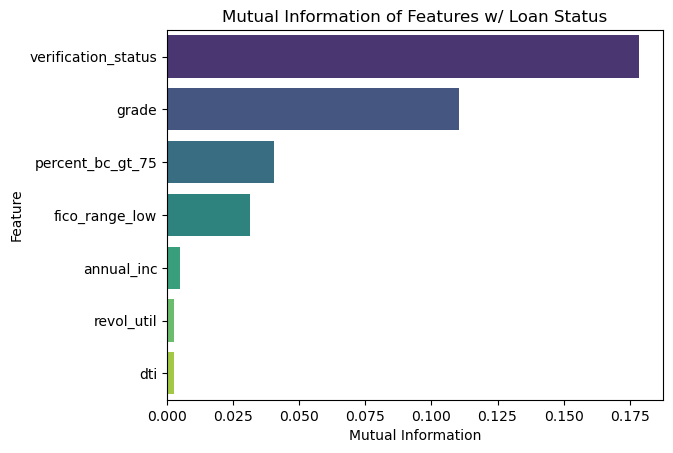

In [176]:
sns.barplot(x='Mutual Information', y='Feature', data=mi_acc_df, palette='viridis')
plt.title("Mutual Information of Features w/ Loan Status")
plt.show()

By this Mutual Information Model, we can see that "verification_status" holds the highest MI score, therefore telling us that a loan charge off or default is more dependent on if a borrower's income is verified or not than our other features. In other words, the "verification_status" field provides the most information for predicting wheather a loan will be charged off or defaulted. 

Furthermore, the grade assigned to the loan by the lender and the percentage of the borrower's bankcards over 75% utilized are also key predictors in the charge-off or default of a loan. 

### <div style="text-align: center;">Naïve Bayes Classification Implementation

A Naïve Bayes Classifier is a supervised machine learning algrothim used for classification. This is based on Bayes Theorem:  

$$
P(A \mid B) = \frac{P(B \mid A) \cdot P(A)}{P(B)}
$$

When: 

- P(A) and P(B) are the probabilities of events A and B
- P(A|B) is the probability of event A given event B
- P(B|A) is the probability of event B given event A

This formula determines the conditional probability of an event based on data and prior knowledge. A Naïve Bayes Classifier uses this to compute the likelihood of a case given a set of features. It can classify data based on these probabilities by assuming each variable is independent, or the features do not depend on each other. 

Therefore, we have: 


$$
P(\text{Loan Default / Charge Off} \mid \text{Grade},\ \text{Annual Income Bracket},\ \text{Verification Status},\ \text{FICO},\ \text{DTI Group},\ \text{Credit Utilization Ratio Group},\ \text{Bankcards > 75\% Utilized})
$$


We can break this down due to the assumption of feature independence. For example, 

$$
\begin{aligned}
P(&\text{Loan Default / Charge Off} \mid \text{Grade E},\ \$50{,}000 - \$60{,}000\ \text{Annual Income Bracket},\ \text{Not Verified},\ 500\ \text{FICO},\ 30\% - 35\%\ \text{DTI Group},\\ &20\% - 25\%\ \text{Credit Utilization Ratio Group},\ 95\% - 100\%\ \text{of Bankcards > 75\% Utilized})
= \\ &\ P(\text{Loan Default / Charge Off} \mid \text{Grade E}) 
\times \\ &\ P(\text{Loan Default / Charge Off} \mid \$50{,}000 - \$60{,}000\ \text{Annual Income Bracket})
\times \\ &\ P(\text{Loan Default / Charge Off} \mid \text{Not Verified}) 
\times \\ &\ P(\text{Loan Default / Charge Off} \mid 500\ \text{FICO}) 
\times \\ &\ P(\text{Loan Default / Charge Off} \mid 30\% - 35\%\ \text{DTI Group}) 
\times \\ &\ P(\text{Loan Default / Charge Off} \mid 20\% - 25\%\ \text{Credit Utilization Ratio Group}) 
\times \\ &\ P(\text{Loan Default / Charge Off} \mid 95\% - 100\%\ \text{of Bankcards > 75\% Utilized}) \\
\end{aligned}
$$

Then, to compute the probability of a loan default or charge off given Grade E, for example, we can use Bayes' Theorem:

$$
P(\text{Loan Default / Charge Off} \mid \text{Grade E}) = 
\frac{P(\text{Grade E} \mid \text{Loan Default / Charge Off}) \cdot 
P(\text{Loan Default / Charge Off})}{P(\text{Grade E})}
$$

We are using Bayes' Theorem to compare probabilities. Therefore, the denominator *(P(Grade E))* will be constant throughout this computation so that:


$$
P(\text{Loan Default / Charge Off} \mid \text{Grade E}) \propto 
P(\text{Grade E} \mid \text{Loan Default / Charge Off}) \cdot 
P(\text{Loan Default / Charge Off})
$$

Additionally,
$$
P(\text{Grade E} \mid \text{Loan Default / Charge Off}) = \frac{\text{Number of Loans Graded E Among Defaulted}}{\text{Total Defaulted Loans}}
$$

Finally,

$$
P(\text{Loan Default / Charge Off}) = \frac{\text{Number of Loan Defaults or Charge Offs}}{\text{Total Loans}}
$$


Source: GeeksforGeeks. (n.d.). Naive Bayes Classifiers. GeeksforGeeks. https://www.geeksforgeeks.org/naive-bayes-classifiers/

Looking at our data:

In [188]:
clean_acc_df.head(15)

,loan_status,grade,annual_inc,verification_status,fico_range_low,dti,revol_util,percent_bc_gt_75,income_group,dti_group,revol_util_group,bc_gt_75_group
0,Fully Paid,C,55000.0,Not Verified,675.0,5.91,29.7,0.0,"(50000.0, 60000.0]","(5.0, 10.0]","(25.0, 30.0]","(-0.001, 5.0]"
1,Fully Paid,C,65000.0,Not Verified,715.0,16.06,19.2,7.7,"(60000.0, 70000.0]","(15.0, 20.0]","(15.0, 20.0]","(5.0, 10.0]"
2,Fully Paid,B,63000.0,Not Verified,695.0,10.78,56.2,50.0,"(60000.0, 70000.0]","(10.0, 15.0]","(55.0, 60.0]","(45.0, 50.0]"
3,Current,C,110000.0,Verified,785.0,17.06,11.6,0.0,"(100000.0, 110000.0]","(15.0, 20.0]","(10.0, 15.0]","(-0.001, 5.0]"
4,Fully Paid,F,104433.0,Verified,695.0,25.37,64.5,60.0,"(100000.0, 110000.0]","(25.0, 30.0]","(60.0, 65.0]","(55.0, 60.0]"
5,Fully Paid,C,34000.0,Verified,690.0,10.20,68.4,100.0,"(30000.0, 40000.0]","(10.0, 15.0]","(65.0, 70.0]","(95.0, 100.0]"
6,Fully Paid,B,180000.0,Not Verified,680.0,14.67,84.5,100.0,"(170000.0, 180000.0]","(10.0, 15.0]","(80.0, 85.0]","(95.0, 100.0]"
7,Fully Paid,B,85000.0,Not Verified,705.0,17.61,5.7,0.0,"(80000.0, 90000.0]","(15.0, 20.0]","(5.0, 10.0]","(-0.001, 5.0]"
8,Fully Paid,A,85000.0,Not Verified,685.0,13.07,34.5,28.6,"(80000.0, 90000.0]","(10.0, 15.0]","(30.0, 35.0]","(25.0, 30.0]"
9,Fully Paid,B,42000.0,Not Verified,700.0,34.80,39.1,33.3,"(40000.0, 50000.0]","(30.0, 35.0]","(35.0, 40.0]","(30.0, 35.0]"


Let's seperate our data into two sets to seperate our charged-off and defaulted loans from the other loans. 

In [192]:
default_chargeoff_loan_acc_df = clean_acc_df[clean_acc_df['loan_status'].isin(['Default / Charged Off'])]

default_chargeoff_loan_acc_df.head(10)

,loan_status,grade,annual_inc,verification_status,fico_range_low,dti,revol_util,percent_bc_gt_75,income_group,dti_group,revol_util_group,bc_gt_75_group
13,Default / Charged Off,E,150000.0,Not Verified,665.0,9.39,40.7,14.3,"(140000.0, 150000.0]","(5.0, 10.0]","(40.0, 45.0]","(10.0, 15.0]"
25,Default / Charged Off,C,35000.0,Verified,725.0,15.22,24.6,0.0,"(30000.0, 40000.0]","(15.0, 20.0]","(20.0, 25.0]","(-0.001, 5.0]"
30,Default / Charged Off,C,65000.0,Not Verified,675.0,18.96,54.3,0.0,"(60000.0, 70000.0]","(15.0, 20.0]","(50.0, 55.0]","(-0.001, 5.0]"
31,Default / Charged Off,F,75000.0,Not Verified,660.0,20.84,65.3,63.6,"(70000.0, 80000.0]","(20.0, 25.0]","(65.0, 70.0]","(60.0, 65.0]"
33,Default / Charged Off,C,79000.0,Not Verified,730.0,34.53,18.6,0.0,"(70000.0, 80000.0]","(30.0, 35.0]","(15.0, 20.0]","(-0.001, 5.0]"
41,Default / Charged Off,D,55000.0,Not Verified,685.0,35.70,78.0,100.0,"(50000.0, 60000.0]","(35.0, 40.0]","(75.0, 80.0]","(95.0, 100.0]"
60,Default / Charged Off,C,42000.0,Not Verified,670.0,9.60,44.8,30.8,"(40000.0, 50000.0]","(5.0, 10.0]","(40.0, 45.0]","(30.0, 35.0]"
63,Default / Charged Off,C,106000.0,Verified,730.0,17.36,72.1,0.0,"(100000.0, 110000.0]","(15.0, 20.0]","(70.0, 75.0]","(-0.001, 5.0]"
65,Default / Charged Off,C,60000.0,Not Verified,690.0,24.29,73.9,87.5,"(50000.0, 60000.0]","(20.0, 25.0]","(70.0, 75.0]","(85.0, 90.0]"
68,Default / Charged Off,C,70000.0,Verified,680.0,16.90,42.0,44.4,"(60000.0, 70000.0]","(15.0, 20.0]","(40.0, 45.0]","(40.0, 45.0]"


In [194]:
print(default_chargeoff_loan_acc_df['loan_status'].unique())

['Default / Charged Off']


In [196]:
other_loan_acc_df = clean_acc_df[~clean_acc_df['loan_status'].isin(['Default / Charged Off'])]

other_loan_acc_df.head(10)

,loan_status,grade,annual_inc,verification_status,fico_range_low,dti,revol_util,percent_bc_gt_75,income_group,dti_group,revol_util_group,bc_gt_75_group
0,Fully Paid,C,55000.0,Not Verified,675.0,5.91,29.7,0.0,"(50000.0, 60000.0]","(5.0, 10.0]","(25.0, 30.0]","(-0.001, 5.0]"
1,Fully Paid,C,65000.0,Not Verified,715.0,16.06,19.2,7.7,"(60000.0, 70000.0]","(15.0, 20.0]","(15.0, 20.0]","(5.0, 10.0]"
2,Fully Paid,B,63000.0,Not Verified,695.0,10.78,56.2,50.0,"(60000.0, 70000.0]","(10.0, 15.0]","(55.0, 60.0]","(45.0, 50.0]"
3,Current,C,110000.0,Verified,785.0,17.06,11.6,0.0,"(100000.0, 110000.0]","(15.0, 20.0]","(10.0, 15.0]","(-0.001, 5.0]"
4,Fully Paid,F,104433.0,Verified,695.0,25.37,64.5,60.0,"(100000.0, 110000.0]","(25.0, 30.0]","(60.0, 65.0]","(55.0, 60.0]"
5,Fully Paid,C,34000.0,Verified,690.0,10.20,68.4,100.0,"(30000.0, 40000.0]","(10.0, 15.0]","(65.0, 70.0]","(95.0, 100.0]"
6,Fully Paid,B,180000.0,Not Verified,680.0,14.67,84.5,100.0,"(170000.0, 180000.0]","(10.0, 15.0]","(80.0, 85.0]","(95.0, 100.0]"
7,Fully Paid,B,85000.0,Not Verified,705.0,17.61,5.7,0.0,"(80000.0, 90000.0]","(15.0, 20.0]","(5.0, 10.0]","(-0.001, 5.0]"
8,Fully Paid,A,85000.0,Not Verified,685.0,13.07,34.5,28.6,"(80000.0, 90000.0]","(10.0, 15.0]","(30.0, 35.0]","(25.0, 30.0]"
9,Fully Paid,B,42000.0,Not Verified,700.0,34.80,39.1,33.3,"(40000.0, 50000.0]","(30.0, 35.0]","(35.0, 40.0]","(30.0, 35.0]"


In [198]:
print(other_loan_acc_df['loan_status'].unique())

['Fully Paid' 'Current' 'In Grace Period' 'Late']


Starting with "grade", lets find the most likley loan grade to be defaulted or charged off. 

$$
P(\text{Loan Default / Charge Off} \mid \text{Grade}) \propto 
P(\text{Grade} \mid \text{Loan Default / Charge Off}) \cdot 
P(\text{Loan Default / Charge Off})
$$

In [202]:
#P(Grade | Loan Default / Charge Off) 

most_likely_grade_def_acc = default_chargeoff_loan_acc_df['grade'].value_counts().idxmax()

#Find the proportion (%) using value.counts()
grade_giv_DC_acc = default_chargeoff_loan_acc_df['grade'].value_counts(normalize=True)

print(f"The most likely grade for a defaulted or charged off loan is:", most_likely_grade_def_acc, 
      "\nP(Grade | Loan Default / Charge Off) =", (grade_giv_DC_acc[most_likely_grade_def_acc]*100).round(2),"%")

#P(Loan Default / Charge Off)
DC = (len(default_chargeoff_loan_acc_df) / len(clean_acc_df))
print(f"P(Loan Default / Charge Off) =", round(DC * 100, 2),'%')

#Therefore...

DC_giv_grade = (grade_giv_DC_acc * DC) *100

print(f"Therefore, P(Loan Default / Charge Off | Grade", most_likely_grade_def_acc,") =", round(DC_giv_grade[most_likely_grade_def_acc],2), "%")

The most likely grade for a defaulted or charged off loan is: C 
P(Grade | Loan Default / Charge Off) = 32.15 %
P(Loan Default / Charge Off) = 11.84 %
Therefore, P(Loan Default / Charge Off | Grade C ) = 3.81 %


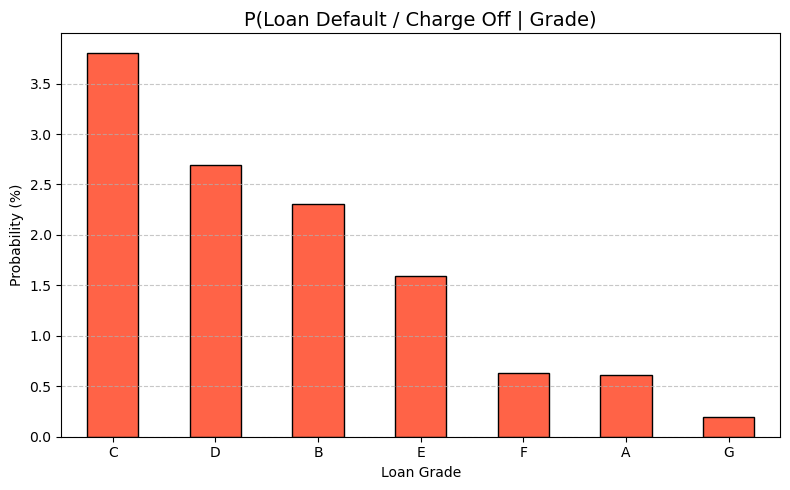

In [204]:
# Plot
plt.figure(figsize=(8, 5))
DC_giv_grade.plot(kind='bar', color='tomato', edgecolor='black')
plt.title('P(Loan Default / Charge Off | Grade)', fontsize=14)
plt.ylabel('Probability (%)')
plt.xlabel('Loan Grade')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

$$
P(\text{Loan Default / Charge Off} \mid \text{Annual Income Bracket}) \propto 
$$

$$
P(\text{Annual Income Bracket} \mid \text{Loan Default / Charge Off}) \cdot 
P(\text{Loan Default / Charge Off})
$$

In [207]:
#P(Annual Income Bracket | Loan Default / Charge Off) 

most_likely_income_def_acc = default_chargeoff_loan_acc_df['income_group'].value_counts().idxmax()

#Find the proportion (%) using value.counts()
inc_giv_DC_acc = default_chargeoff_loan_acc_df['income_group'].value_counts(normalize=True)

print(f"The most likely annual income bracket for a defaulted or charged off loan is:", most_likely_income_def_acc, 
      "\nP(Annual Income Bracket | Loan Default / Charge Off) =", (inc_giv_DC_acc[most_likely_income_def_acc]*100).round(2),"%")

#We already have P(Loan Default / Charge Off)

print(f"We know P(Loan Default / Charge Off) =", round(DC * 100, 2),'%')

#Therefore...

DC_giv_inc = (inc_giv_DC_acc * DC) *100

print(f"Therefore, P(Loan Default / Charge Off | $", most_likely_income_def_acc, "Annual Income Bracket) =", round(DC_giv_inc[most_likely_income_def_acc],2), "%")

The most likely annual income bracket for a defaulted or charged off loan is: (40000.0, 50000.0] 
P(Annual Income Bracket | Loan Default / Charge Off) = 15.27 %
We know P(Loan Default / Charge Off) = 11.84 %
Therefore, P(Loan Default / Charge Off | $ (40000.0, 50000.0] Annual Income Bracket) = 1.81 %


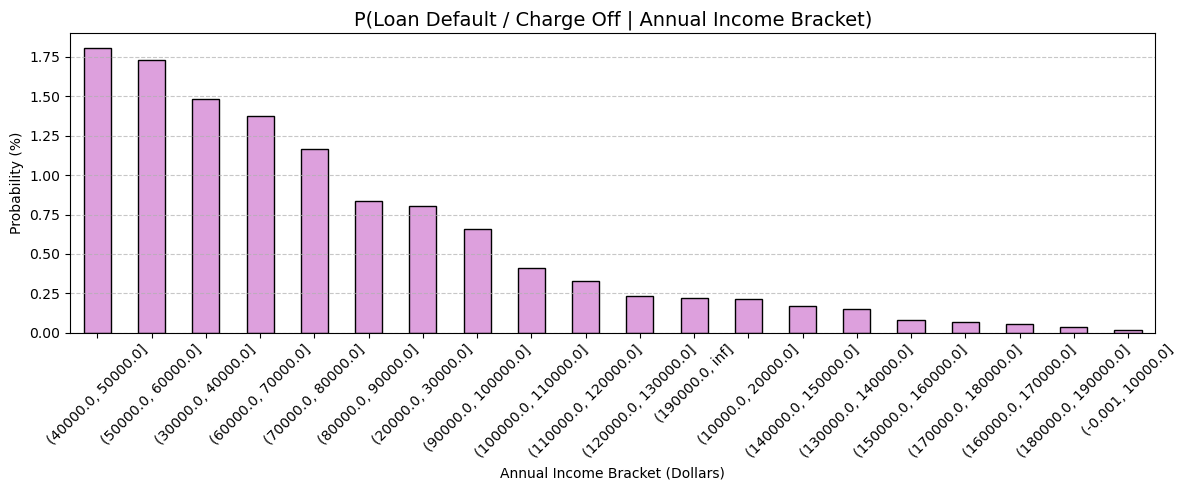

In [209]:
# Plot
plt.figure(figsize=(12, 5))
DC_giv_inc.plot(kind='bar', color='plum', edgecolor='black')
plt.title('P(Loan Default / Charge Off | Annual Income Bracket)', fontsize=14)
plt.ylabel('Probability (%)')
plt.xlabel('Annual Income Bracket (Dollars)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

$$
P(\text{Loan Default / Charge Off} \mid \text{Verification Status}) \propto 
P(\text{Verification Status} \mid \text{Loan Default / Charge Off}) \cdot 
P(\text{Loan Default / Charge Off})
$$

In [212]:
#P(Verification Status | Loan Default / Charge Off) 

most_likely_VS_def_acc = default_chargeoff_loan_acc_df['verification_status'].value_counts().idxmax()

#Find the proportion (%) using value.counts()
VS_giv_DC_acc = default_chargeoff_loan_acc_df['verification_status'].value_counts(normalize=True)

print(f"The most likely verification status for a defaulted or charged off loan is:", most_likely_VS_def_acc, 
      "\nP(Verification Status | Loan Default / Charge Off) =", (VS_giv_DC_acc[most_likely_VS_def_acc]*100).round(2),"%")

#We already have P(Loan Default / Charge Off)

print(f"We know P(Loan Default / Charge Off) =", round(DC * 100, 2),'%')

#Therefore...

DC_giv_VS = (VS_giv_DC_acc * DC) *100

print(f"Therefore, P(Loan Default / Charge Off |", most_likely_VS_def_acc, "Verification Status) =", round(DC_giv_VS[most_likely_VS_def_acc],2), "%")

The most likely verification status for a defaulted or charged off loan is: Verified 
P(Verification Status | Loan Default / Charge Off) = 78.17 %
We know P(Loan Default / Charge Off) = 11.84 %
Therefore, P(Loan Default / Charge Off | Verified Verification Status) = 9.26 %


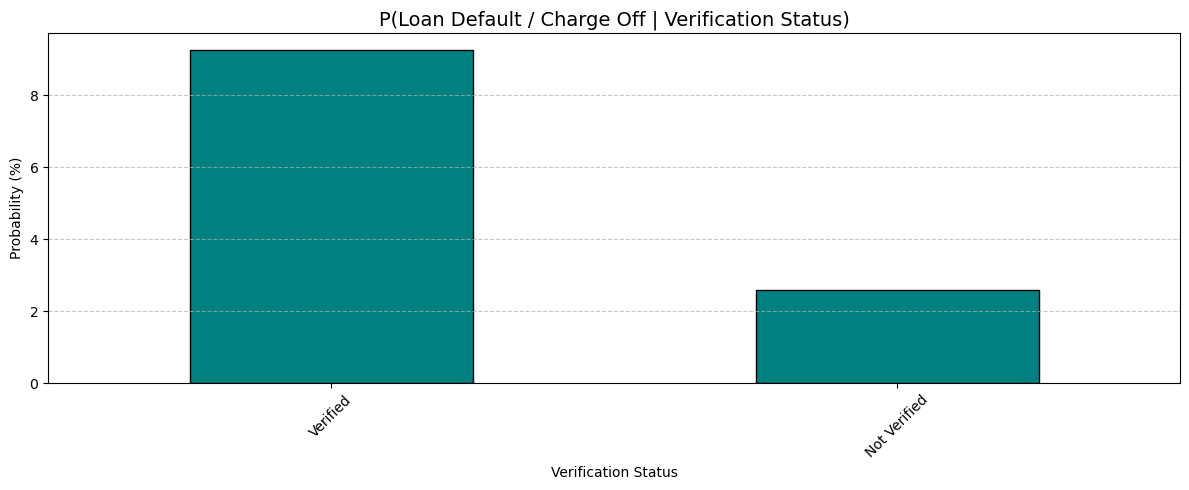

In [214]:
plt.figure(figsize=(12, 5))
DC_giv_VS.plot(kind='bar', color='teal', edgecolor='black')
plt.title('P(Loan Default / Charge Off | Verification Status)', fontsize=14)
plt.ylabel('Probability (%)')
plt.xlabel('Verification Status')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

$$
P(\text{Loan Default / Charge Off} \mid \text{Lowest Reported FICO Credit Score During Installment}) \propto 
$$

$$
P(\text{Lowest Reported FICO Credit Score During Installment} \mid \text{Loan Default / Charge Off}) \cdot 
P(\text{Loan Default / Charge Off})
$$

In [217]:
#P(Lowest Reported FICO Credit Score During Installment | Loan Default / Charge Off) 

most_likely_FICO_def_acc = default_chargeoff_loan_acc_df['fico_range_low'].value_counts().idxmax()

#Find the proportion (%) using value.counts()
FICO_giv_DC_acc = default_chargeoff_loan_acc_df['fico_range_low'].value_counts(normalize=True)

print(f"The most likely lowest reported FICO Credit Score for a defaulted or charged off loan is:", most_likely_FICO_def_acc, 
      "\nP(Lowest Reported FICO Credit Score During Installment | Loan Default / Charge Off) =", (FICO_giv_DC_acc[most_likely_FICO_def_acc]*100).round(2),"%")

#We already have P(Loan Default / Charge Off)

print(f"We know P(Loan Default / Charge Off) =", round(DC * 100, 2),'%')

#Therefore...

DC_giv_FICO = (FICO_giv_DC_acc * DC) *100

print(f"Therefore, P(Loan Default / Charge Off | A Lowest Reported FICO Credit Score of", most_likely_FICO_def_acc, ") =", round(DC_giv_FICO[most_likely_FICO_def_acc],2), "%")

The most likely lowest reported FICO Credit Score for a defaulted or charged off loan is: 660.0 
P(Lowest Reported FICO Credit Score During Installment | Loan Default / Charge Off) = 12.22 %
We know P(Loan Default / Charge Off) = 11.84 %
Therefore, P(Loan Default / Charge Off | A Lowest Reported FICO Credit Score of 660.0 ) = 1.45 %


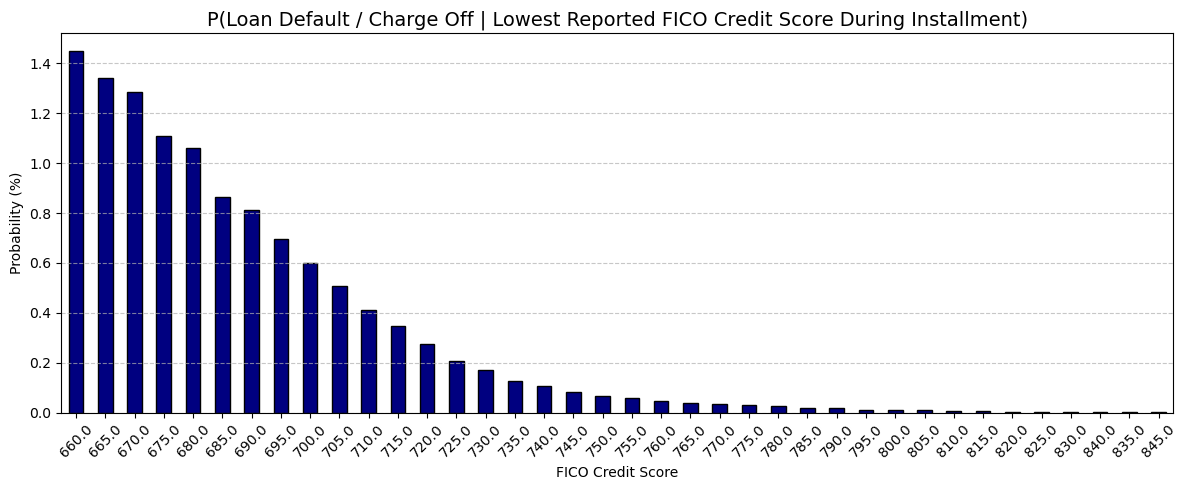

In [219]:
plt.figure(figsize=(12, 5))
DC_giv_FICO.plot(kind='bar', color='navy', edgecolor='black')
plt.title('P(Loan Default / Charge Off | Lowest Reported FICO Credit Score During Installment)', fontsize=14)
plt.ylabel('Probability (%)')
plt.xlabel('FICO Credit Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

$$
P(\text{Loan Default / Charge Off} \mid \text{Debt-To-Income Ratio Group}) \propto 
$$

$$
P(\text{Debt-To-Income Ratio Group} \mid \text{Loan Default / Charge Off}) \cdot 
P(\text{Loan Default / Charge Off})
$$

In [222]:
#P(DTI Ratio | Loan Default / Charge Off) 

most_likely_DTI_def_acc = default_chargeoff_loan_acc_df['dti_group'].value_counts().idxmax()

#Find the proportion (%) using value.counts()
DTI_giv_DC_acc = default_chargeoff_loan_acc_df['dti_group'].value_counts(normalize=True)

print(f"The most likely Debt-To-Income Ratio group for a defaulted or charged off loan is:", most_likely_DTI_def_acc, 
      "\nP(Debt-To-Income Ratio Group | Loan Default / Charge Off) =", (DTI_giv_DC_acc[most_likely_DTI_def_acc]*100).round(2),"%")

#We already have P(Loan Default / Charge Off)

print(f"We know P(Loan Default / Charge Off) =", round(DC * 100, 2),'%')

#Therefore...

DC_giv_DTI = (DTI_giv_DC_acc * DC) *100

print(f"Therefore, P(Loan Default / Charge Off | A Debt-To-Income Ratio group of", most_likely_DTI_def_acc, "%) =", round(DC_giv_DTI[most_likely_DTI_def_acc],2), "%")

The most likely Debt-To-Income Ratio group for a defaulted or charged off loan is: (15.0, 20.0] 
P(Debt-To-Income Ratio Group | Loan Default / Charge Off) = 20.37 %
We know P(Loan Default / Charge Off) = 11.84 %
Therefore, P(Loan Default / Charge Off | A Debt-To-Income Ratio group of (15.0, 20.0] %) = 2.41 %


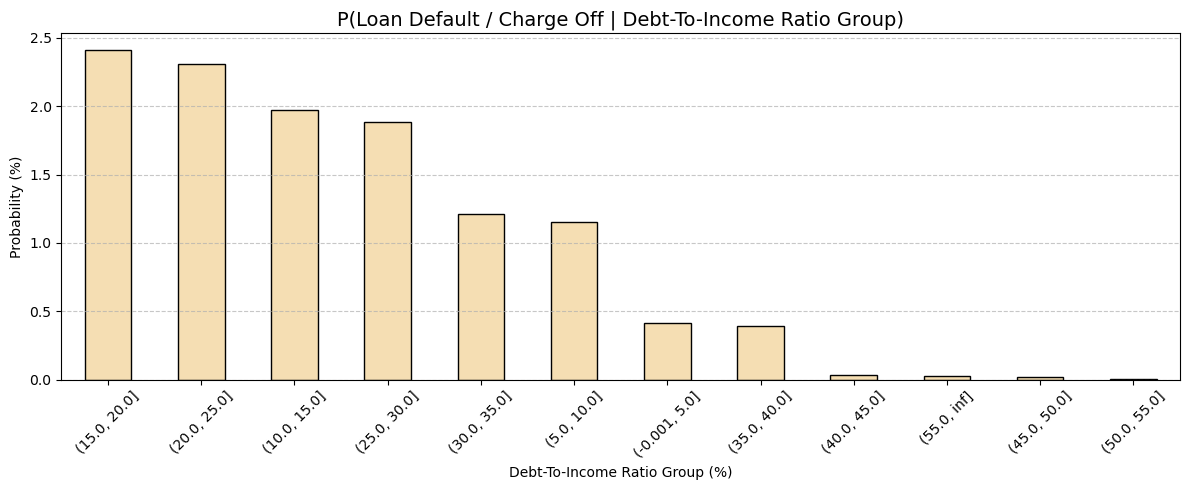

In [224]:
plt.figure(figsize=(12, 5))
DC_giv_DTI.plot(kind='bar', color='wheat', edgecolor='black')
plt.title('P(Loan Default / Charge Off | Debt-To-Income Ratio Group)', fontsize=14)
plt.ylabel('Probability (%)')
plt.xlabel('Debt-To-Income Ratio Group (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

$$
P(\text{Loan Default / Charge Off} \mid \text{Credit Utilization Ratio Group}) \propto 
$$

$$
P(\text{Credit Utilization Ratio Group} \mid \text{Loan Default / Charge Off}) \cdot 
P(\text{Loan Default / Charge Off})
$$

In [227]:
#P(Utilization Ratio | Loan Default / Charge Off) 

most_likely_util_def_acc = default_chargeoff_loan_acc_df['revol_util_group'].value_counts().idxmax()

#Find the proportion (%) using value.counts()
util_giv_DC_acc = default_chargeoff_loan_acc_df['revol_util_group'].value_counts(normalize=True)

print(f"The most likely Credit Utilization Ratio group for a defaulted or charged off loan is:", most_likely_util_def_acc, 
      "\nP(Credit Utilization Ratio | Loan Default / Charge Off) =", (util_giv_DC_acc[most_likely_util_def_acc]*100).round(2),"%")

#We already have P(Loan Default / Charge Off)

print(f"We know P(Loan Default / Charge Off) =", round(DC * 100, 2),'%')

#Therefore...

DC_giv_util = (util_giv_DC_acc * DC) *100

print(f"Therefore, P(Loan Default / Charge Off | A Credit Utilization Ratio group of", most_likely_util_def_acc, "%) =", round(DC_giv_util[most_likely_util_def_acc],2), "%")

The most likely Credit Utilization Ratio group for a defaulted or charged off loan is: (55.0, 60.0] 
P(Credit Utilization Ratio | Loan Default / Charge Off) = 7.54 %
We know P(Loan Default / Charge Off) = 11.84 %
Therefore, P(Loan Default / Charge Off | A Credit Utilization Ratio group of (55.0, 60.0] %) = 0.89 %


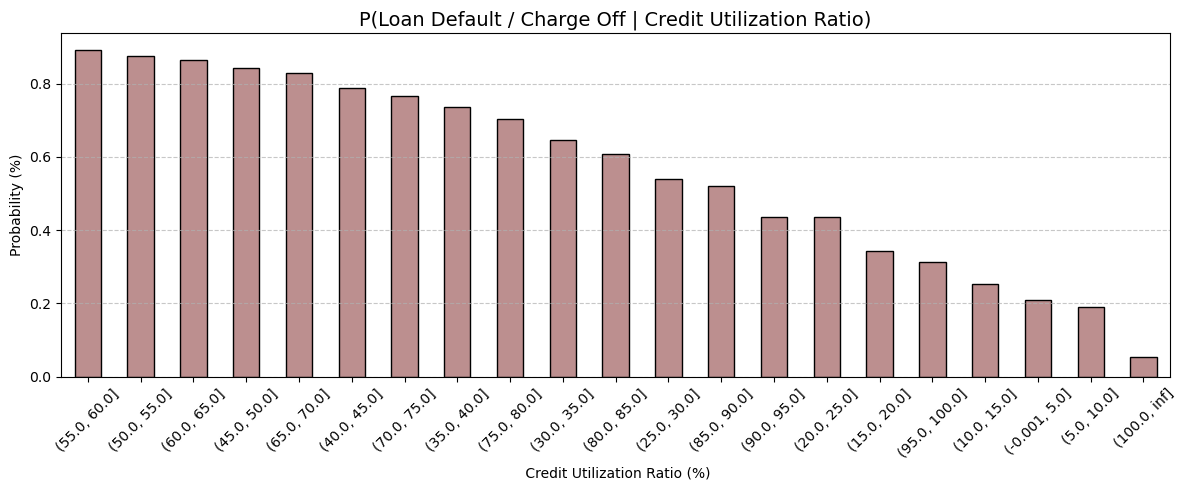

In [229]:
plt.figure(figsize=(12, 5))
DC_giv_util.plot(kind='bar', color='rosybrown', edgecolor='black')
plt.title('P(Loan Default / Charge Off | Credit Utilization Ratio)', fontsize=14)
plt.ylabel('Probability (%)')
plt.xlabel(' Credit Utilization Ratio (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

$$
P(\text{Loan Default / Charge Off} \mid \% \text{ of Bankcards > 75\% Utilized}) \propto 
$$

$$
P(\% \text{ of Bankcards > 75\% Utilized} \mid \text{Loan Default / Charge Off}) \cdot 
P(\text{Loan Default / Charge Off})
$$

In [232]:
#P(% of bankcards > 75% Utilized | Loan Default / Charge Off) 

most_likely_bc_gt_def_acc = default_chargeoff_loan_acc_df['bc_gt_75_group'].value_counts().idxmax()

#Find the proportion (%) using value.counts()
bc_gt_giv_DC_acc = default_chargeoff_loan_acc_df['bc_gt_75_group'].value_counts(normalize=True)

print(f"The most likely group percentage of bankcards over 75% utilized for a defaulted or charged off loan is:", most_likely_bc_gt_def_acc, 
      "\nP(% of Bankcards over 75% Utilized | Loan Default / Charge Off) =", (bc_gt_giv_DC_acc[most_likely_bc_gt_def_acc]*100).round(2),"%")

#We already have P(Loan Default / Charge Off)

print(f"We know P(Loan Default / Charge Off) =", round(DC * 100, 2),'%')

#Therefore...

DC_giv_bc_gt = (bc_gt_giv_DC_acc * DC) *100

print(f"Therefore, P(Loan Default / Charge Off |" , most_likely_bc_gt_def_acc, "% of bankcards over 75% utilized) =", round(DC_giv_bc_gt[most_likely_bc_gt_def_acc],2), "%")

The most likely group percentage of bankcards over 75% utilized for a defaulted or charged off loan is: (95.0, 100.0] 
P(% of Bankcards over 75% Utilized | Loan Default / Charge Off) = 21.16 %
We know P(Loan Default / Charge Off) = 11.84 %
Therefore, P(Loan Default / Charge Off | (95.0, 100.0] % of bankcards over 75% utilized) = 2.51 %


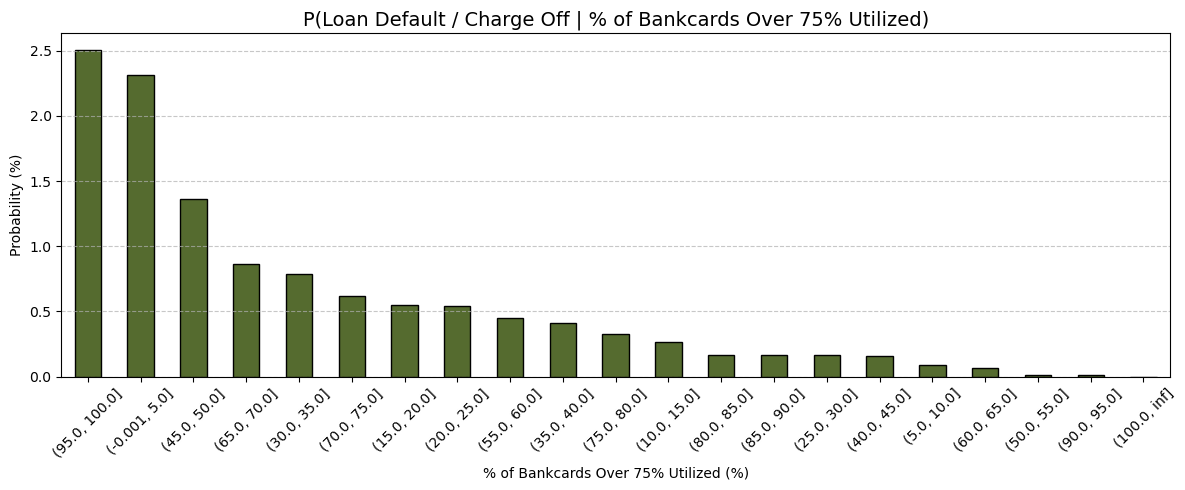

In [234]:
plt.figure(figsize=(12, 5))
DC_giv_bc_gt.plot(kind='bar', color='darkolivegreen', edgecolor='black')
plt.title('P(Loan Default / Charge Off | % of Bankcards Over 75% Utilized)', fontsize=14)
plt.ylabel('Probability (%)')
plt.xlabel('% of Bankcards Over 75% Utilized (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Pulling it all together: 

However! This is about to create a HUGE dataframe, more than 56 million rows. 

In [238]:
len(DC_giv_grade) * len(DC_giv_inc) * len(DC_giv_VS) * len(DC_giv_FICO) * len(DC_giv_DTI) * len(DC_giv_util) * len(DC_giv_bc_gt)

56306880

This will not work. 

### <div style="text-align: center;">Lazy Evaluation

Lazy Evaluation is a strategy that allows us to delay a specific computation until its first use. This allows us to generate a combination only when needed, thus keeping memory usage at a minimum. 

Note: This computation is still very computationally expensive (slow), and may take up to 2 hours. 

Source: GeeksforGeeks. (n.d.). Scala Lazy Evaluation. GeeksforGeeks. https://www.geeksforgeeks.org/scala-lazy-evaluation/

In [243]:
import itertools ##itertools and heapq library help from: OpenAI. (2025). ChatGPT (GPT-4 model). OpenAI. https://openai.com/chatgpt
import heapq

def generate_combo():
    
    for combo in itertools.product(
        DC_giv_grade.keys(), 
        DC_giv_inc.keys(), 
        DC_giv_VS.keys(), 
        DC_giv_FICO.keys(), 
        DC_giv_DTI.keys(),
        DC_giv_util.keys(),
        DC_giv_bc_gt.keys()
    ):
        prob = (
        DC_giv_grade[combo[0]] / 100 *
        DC_giv_inc[combo[1]] / 100 *
        DC_giv_VS[combo[2]] / 100 *
        DC_giv_FICO[combo[3]] / 100 *
        DC_giv_DTI[combo[4]] / 100 *
        DC_giv_util[combo[5]] / 100 *
        DC_giv_bc_gt[combo[6]] / 100) * 100

        yield (prob, combo)


n = 100000 # number of combos to keep

In [245]:
top_combos = heapq.nlargest(n, generate_combo(), key=lambda x: x[0]) #Do not run unless necessary - will take a very long time

In [246]:
low_combos = heapq.nsmallest(n, generate_combo(), key=lambda x: x[0])

In [268]:
high_combos_acc_df = pd.DataFrame([{
    'Grade': combo[0],
    'Annual Income Bracket': combo[1],
    'Verification Status': combo[2],
    'Lowest Reported FICO Credit Score': combo[3],
    'Debt-To-Income Ratio Group': combo[4],
    'Credit Utilization Ratio Group': combo[5],
    '% of Bankcards Over 75% Utilized': combo[6],
    'Probability': prob} 
    for prob, combo in top_combos])

high_combos_acc_df.head()

,Grade,Annual Income Bracket,Verification Status,Lowest Reported FICO Credit Score,Debt-To-Income Ratio Group,Credit Utilization Ratio Group,% of Bankcards Over 75% Utilized,Probability
0,C,"(40000.0, 50000.0]",Verified,660.0,"(15.0, 20.0]","(55.0, 60.0]","(95.0, 100.0]",4.984083e-10
1,C,"(40000.0, 50000.0]",Verified,660.0,"(15.0, 20.0]","(50.0, 55.0]","(95.0, 100.0]",4.880541e-10
2,C,"(40000.0, 50000.0]",Verified,660.0,"(15.0, 20.0]","(60.0, 65.0]","(95.0, 100.0]",4.819950e-10
3,C,"(40000.0, 50000.0]",Verified,660.0,"(20.0, 25.0]","(55.0, 60.0]","(95.0, 100.0]",4.773996e-10
4,C,"(50000.0, 60000.0]",Verified,660.0,"(15.0, 20.0]","(55.0, 60.0]","(95.0, 100.0]",4.758957e-10


In [261]:
high_combos_acc_df.to_excel('high_combos_acc_df.xlsx', index=False)

In [272]:
low_combos_acc_df = pd.DataFrame([{
    'Grade': combo[0],
    'Annual Income Bracket': combo[1],
    'Verification Status': combo[2],
    'Lowest Reported FICO Credit Score': combo[3],
    'Debt-To-Income Ratio Group': combo[4],
    'Credit Utilization Ratio Group': combo[5],
    '% of Bankcards Over 75% Utilized': combo[6],
    'Probability': prob} 
    for prob, combo in low_combos])

low_combos_acc_df.head()

,Grade,Annual Income Bracket,Verification Status,Lowest Reported FICO Credit Score,Debt-To-Income Ratio Group,Credit Utilization Ratio Group,% of Bankcards Over 75% Utilized,Probability
0,C,"(40000.0, 50000.0]",Verified,660.0,"(15.0, 20.0]","(55.0, 60.0]","(100.0, inf]",0.0
1,C,"(40000.0, 50000.0]",Verified,660.0,"(15.0, 20.0]","(50.0, 55.0]","(100.0, inf]",0.0
2,C,"(40000.0, 50000.0]",Verified,660.0,"(15.0, 20.0]","(60.0, 65.0]","(100.0, inf]",0.0
3,C,"(40000.0, 50000.0]",Verified,660.0,"(15.0, 20.0]","(45.0, 50.0]","(100.0, inf]",0.0
4,C,"(40000.0, 50000.0]",Verified,660.0,"(15.0, 20.0]","(65.0, 70.0]","(100.0, inf]",0.0


In [265]:
low_combos_acc_df.to_excel('low_combos_acc_df.xlsx', index=False)

Therefore, we can see the most probable loan default or charge off:

$$
\begin{aligned}
P(&\text{Loan Default / Charge Off} \mid \text{Grade C},\ \$40{,}000 - \$50{,}000\ \text{Annual Income Bracket},\ \text{Verified},\ 660\ \text{FICO},\ 15\% - 20\%\ \text{DTI Group},\\ &55\% - 60\%\ \text{Credit Utilization Ratio Group},\ 95\% - 100\%\ \text{of Bankcards > 75\% Utilized}) =
\end{aligned}
$$

$$
3.81\% \times 1.81\% \times 9.26\% \times 1.45\% \times 2.41\% \times 0.89\% \times 2.51\% = 4.83 \times 10^{-8} \%
$$

### <div style="text-align: center;">K-Fold Cross Validation

A K-Fold Cross Validation on our Naïve Bayes Classification model will allow us to evaluate how well the model did to generalizes our data. After splitting our dataset into "k" folds, we can train our model on "k-1" folds, before testing it on the remaining fold. Repeating this process "k" times, we can compute the average accuracy of our model across these splits. 

Source / K-Fold Cross Validation Template: 

Lakshmipathi, C. (n.d.). A Deep Dive: Naïve Bayes Classifier and K-Fold Cross Validation. Medium. https://chiraglakshmipathi.medium.com/a-deep-dive-na%C3%AFve-bayes-classifier-and-k-fold-cross-validation-d9fe179ffd76

In [276]:
from sklearn.model_selection import KFold
import math

def naive_bayes_kfold(df, target_col, feature_cols, k, random_state=42):
    X = df[feature_cols]
    y = df[target_col]
    
    kf = KFold(n_splits=k, shuffle=True, random_state=random_state)
    accuracies = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Calculate priors
        prior_accepted = (y_train == 1).mean()
        prior_rejected = (y_train == 0).mean()

        # Calculate conditional probabilities
        accept_probs = {}
        reject_probs = {}

        for feature in feature_cols:
            accept_probs[feature] = X_train[y_train == 1][feature].value_counts(normalize=True).to_dict()
            reject_probs[feature] = X_train[y_train == 0][feature].value_counts(normalize=True).to_dict()

        # Prediction function using log-probabilities
        def predict(row):
            log_p_accept = math.log(prior_accepted + 1e-10)  # avoid log(0)
            log_p_reject = math.log(prior_rejected + 1e-10)
            for feature in feature_cols:
                val = row[feature]
                log_p_accept += math.log(accept_probs[feature].get(val, 1e-3)) #Usage of log to multiply small probs
                log_p_reject += math.log(reject_probs[feature].get(val, 1e-3))
            return 1 if log_p_accept > log_p_reject else 0

        # Apply prediction
        y_pred = X_test.apply(predict, axis=1)

        # Accuracy
        accuracy = np.mean(y_pred.values == y_test.values)
        accuracies.append(accuracy)

    print(f"The average accuracy across {k} folds is:", np.mean(accuracies).round(3) * 100,"%.")

    return accuracies


Converting "loan_status" to binary once again, call "naive_bayes_kfold": 

In [279]:
val_acc_df = clean_acc_df[["loan_status", "grade", "income_group", "verification_status", 
"fico_range_low", "dti_group", "revol_util_group", "bc_gt_75_group"]].copy()

val_acc_df.loc[:, 'loan_status'] = val_acc_df['loan_status'].replace({
    'Fully Paid': 1, #Accept
    'Current': 1,
    'Late' : 1,
    'In Grace Period': 1, 
    'Default / Charged Off': 0}) #Reject 

features = val_acc_df.columns.drop('loan_status').tolist()

C:\Users\alecp\AppData\Local\Temp\ipykernel_19828\2512093870.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  val_acc_df.loc[:, 'loan_status'] = val_acc_df['loan_status'].replace({


In [281]:
accuracies = naive_bayes_kfold(val_acc_df, target_col = 'loan_status', feature_cols = features, k=10)

The average accuracy across 10 folds is: 87.3 %.


In [283]:
accuracies

[0.8733534853897591,
 0.8725977832737931,
 0.8729687643125401,
 0.8727580837226344,
 0.8731061646972611,
 0.8724420628377759,
 0.8733901254923514,
 0.87214377642107,
 0.8725788796321317,
 0.8731559638910135]

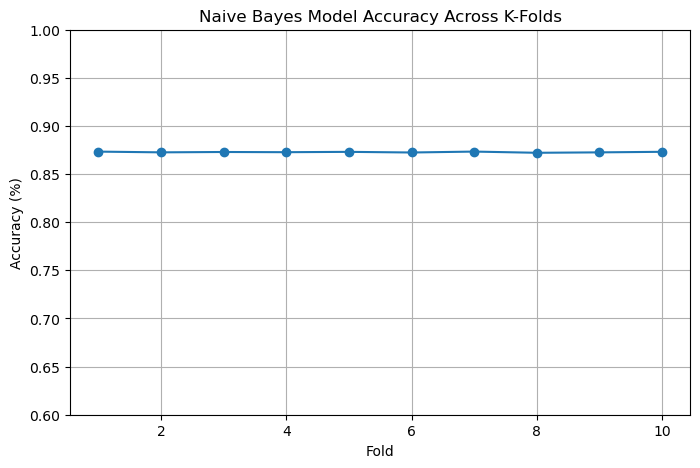

In [287]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(accuracies)+1), accuracies, marker='o', linestyle='-')
plt.title('Naive Bayes Model Accuracy Across K-Folds')
plt.xlabel('Fold')
plt.ylabel('Accuracy (%)')
plt.ylim(0.6, 1)
plt.grid(True)
plt.show()

### <div style="text-align: center;"> Part 1: Summary 

In this portion of the study, we were able to perform a Naïve Bayes Classification to predict the status of accepted loans. Keeping in mind the 5 C's of credit, we chose features that were heavily associated with the creditworthiness of a borrower, such as the borrower's Debt-To-Income Ratio and FICO Credit Score. Using these indicators, a Naïve Bayes Classification model was a simple way to probabilistically predict the creditworthiness and associated risk of the borrower, thus, the likelihood of the loan defaulting or being charged off.  

From our model, we were able to see the risk associated with combinations of factors and the selected factors themselves. For example, a charged-off or defaulted loan was highly associated with a low FICO Credit Score, and continuously improved as the score increased. Our model was able to generalize what a charged-off or defaulted loan looked like based on these features, and by utilizing a K-Fold Cross Validation model, we were able to see how accurately this generalization applied to our entire dataset. 

With an accuracy of 87%, we can see that our Naïve Bayes Classification worked very well, and our features proved to be strong predictors in the creditworthiness of a borrower, despite our imbalanced data (we didn't have very many defaulted or charged-off loans). 

Overall, this portion of the study demonstrated that a Naïve Bayes Classification was a very effective algorithm for credit risk prediction, despite its simplicity and independence assumptions. 

## <div style="text-align: center;">Part 2: Nearest Neighbor Algorithm for Accepted & Rejected Loans

### <div style="text-align: center;"> Exploratory Data Analysis & Data Scrubbing - Rejected Loans

Viewing our datasets: 

In Part 1, we cleaned "acc_df" of fields containing mostly null values. We will use this cleaned dataset in Part 2 as well.

In [293]:
pre_clean_acc_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,...,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,...,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,...,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
3,66310712,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,...,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,...,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N


In [295]:
rej_df.head(20)

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0
5,15000.0,2007-05-27,Trinfiniti,645.0,0%,105xx,NY,3 years,0.0
6,10000.0,2007-05-27,NOTIFYi Inc,693.0,10%,210xx,MD,< 1 year,0.0
7,3900.0,2007-05-27,For Justin.,700.0,10%,469xx,IN,2 years,0.0
8,3000.0,2007-05-28,title?,694.0,10%,808xx,CO,4 years,0.0
9,2500.0,2007-05-28,timgerst,573.0,11.76%,407xx,KY,4 years,0.0


Before combining the datasets, we need to select variables that are most associated with a loan application approval or rejection. These variables must be the same for each dataset. 

With a small number of variables in "rej_df", we have little to choose from. 

First, let's clear this dataset of fields containing mostly null values. 

Amount Requested        1.000000
Application Date        1.000000
Loan Title              0.999953
Risk_Score              0.330977
Debt-To-Income Ratio    1.000000
Zip Code                0.999989
State                   0.999999
Employment Length       0.965591
Policy Code             0.999967
dtype: float64


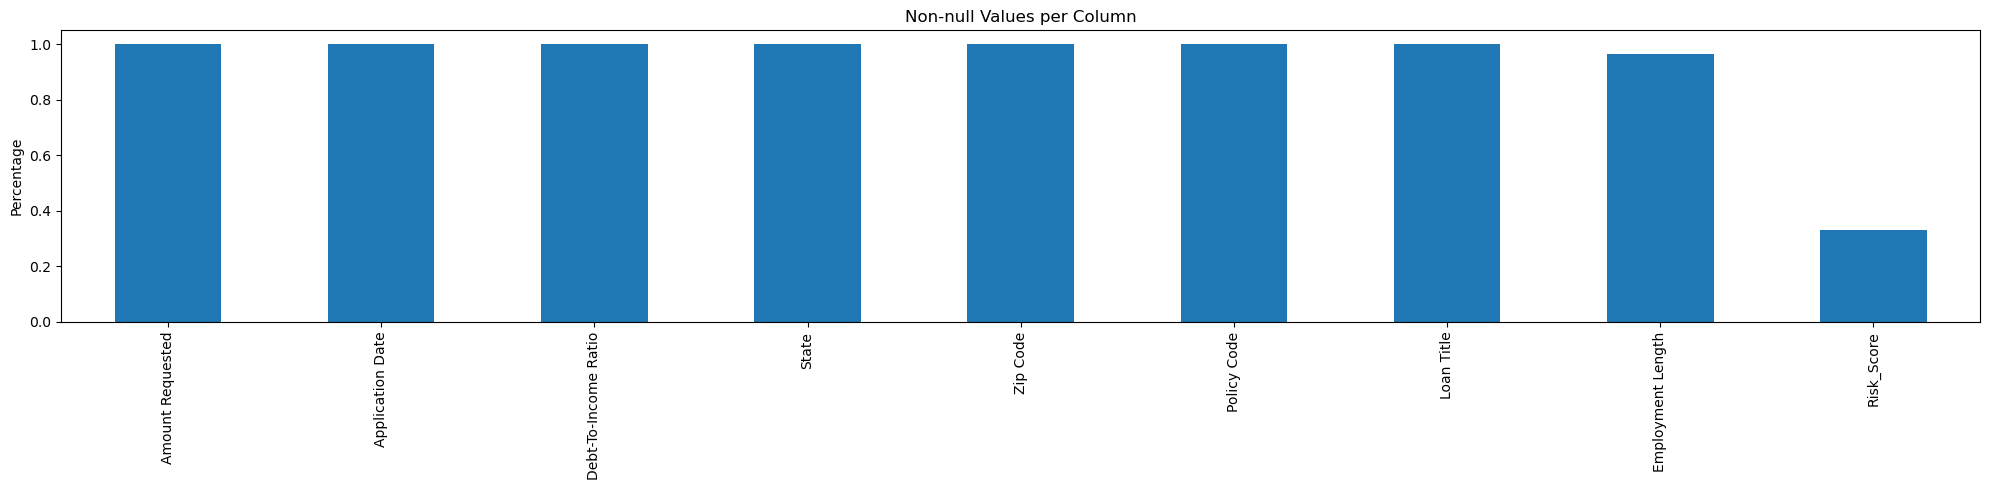

In [298]:
non_null_counts_rej = 1 - rej_df.isnull().mean()
print(non_null_counts_rej)

non_null_counts_rej.sort_values(ascending=False).plot(kind='bar', figsize=(20,5))
plt.title("Non-null Values per Column")
plt.ylabel("Percentage")
plt.tight_layout()
plt.show()

Taking out "Risk_Score":

(Unfortunately, this may have been a highly correlated variable. Although, there was no clear matchup in our accepted loan dataset.)

In [301]:
pre_clean_rej_df = rej_df.drop('Risk_Score', axis=1)

In [303]:
pre_clean_rej_df.head()

,Amount Requested,Application Date,Loan Title,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,9.43%,209xx,MD,< 1 year,0.0


Keeping in mind the 5 C's of credit: 
- Character
- Capacity
- Capital
- Collateral
- Conditions

Fields such as "Policy Code" and "Zip Code" will not be useful. Additionally, with the unstructured text data in "Loan Title", this field will be extremely hard to work with and yield few results. 

Therefore, let's investigate the correlation between the fields: 
- "Amount Requested" - The amount of money the borrower applied for. This is the same as "loan_amnt".
- "Debt-To-Income Ratio" - DTI, calculates the percentage of one's gross monthly income over one's debt. This is the same as "dti".
- "Employment Length" -  Number of years the borrower has been employed. This is the same as "emp_length". 
- "State" -  U.S. state provided by the borrower. This is the same as "addr_state". (This is most likely not a heavily associated variable.)

Let's limit our accepted and rejected loan datasets to only these fields, and add a new column to classify the loan approval status:

Our classification will follow "app_status": 
- "1" = An approved loan application
- "0" = A declined loan application

In [307]:
part2_clean_acc_df = pre_clean_acc_df[["loan_amnt", "dti", "emp_length", 
"addr_state"]].copy()

part2_clean_acc_df['app_status'] = 1

part2_clean_acc_df.head()

,loan_amnt,dti,emp_length,addr_state,app_status
0,3600.0,5.91,10+ years,PA,1
1,24700.0,16.06,10+ years,SD,1
2,20000.0,10.78,10+ years,IL,1
3,35000.0,17.06,10+ years,NJ,1
4,10400.0,25.37,3 years,PA,1


In [309]:
part2_clean_rej_df = pre_clean_rej_df[["Amount Requested", "Debt-To-Income Ratio", "Employment Length", "State"]].copy()

part2_clean_rej_df['app_status'] = 0

part2_clean_rej_df.head()

,Amount Requested,Debt-To-Income Ratio,Employment Length,State,app_status
0,1000.0,10%,4 years,NM,0
1,1000.0,10%,< 1 year,MA,0
2,11000.0,10%,1 year,MD,0
3,6000.0,38.64%,< 1 year,MA,0
4,1500.0,9.43%,< 1 year,MD,0


Notice how "Debt-To-Income_Ratio" includes "%", let's take this out and match the data type in "emp_length". 

In [312]:
part2_clean_rej_df['Debt-To-Income Ratio'] = part2_clean_rej_df['Debt-To-Income Ratio'].str.replace('%', '').astype(float)

part2_clean_rej_df.head()

,Amount Requested,Debt-To-Income Ratio,Employment Length,State,app_status
0,1000.0,10.00,4 years,NM,0
1,1000.0,10.00,< 1 year,MA,0
2,11000.0,10.00,1 year,MD,0
3,6000.0,38.64,< 1 year,MA,0
4,1500.0,9.43,< 1 year,MD,0


Matching our rejected and accepted loan dataset column names:

In [315]:
part2_clean_rej_df = part2_clean_rej_df.rename(columns={'Amount Requested': 'loan_amnt', 'Debt-To-Income Ratio' : 'dti', 'Employment Length' : 'emp_length', 'State' : 'addr_state'})

part2_clean_rej_df.head()

,loan_amnt,dti,emp_length,addr_state,app_status
0,1000.0,10.00,4 years,NM,0
1,1000.0,10.00,< 1 year,MA,0
2,11000.0,10.00,1 year,MD,0
3,6000.0,38.64,< 1 year,MA,0
4,1500.0,9.43,< 1 year,MD,0


Combining these datasets: 

In [318]:
clean_acc_rej_df = pd.concat([part2_clean_acc_df, part2_clean_rej_df], axis=0)

clean_acc_rej_df.head()

,loan_amnt,dti,emp_length,addr_state,app_status
0,3600.0,5.91,10+ years,PA,1
1,24700.0,16.06,10+ years,SD,1
2,20000.0,10.78,10+ years,IL,1
3,35000.0,17.06,10+ years,NJ,1
4,10400.0,25.37,3 years,PA,1


In [320]:
len(clean_acc_rej_df) #We are looking at more than 29 million loans here! 

29909442

Looking at the amount of null values: 

In [338]:
clean_acc_rej_df.isnull().sum()

loan_amnt                    0
dti                          0
emp_length                   0
addr_state                   0
app_status                   0
loan_amount_bracket          0
dti_group              1165193
dtype: int64

In [325]:
rows_with_null_acc_rej = clean_acc_rej_df.isnull().any(axis = 1).sum()
print(f"There are:", rows_with_null_acc_rej, "loans that contain one or more null values in our cleaned dataset.")
print(f"This is: ", (rows_with_null_acc_rej / len(clean_acc_rej_df) * 100).round(2), "% of our data.")

There are: 1098430 loans that contain one or more null values in our cleaned dataset.
This is:  3.67 % of our data.


In [327]:
clean_acc_rej_df.dropna(inplace=True)
clean_acc_rej_df.isnull().sum()

loan_amnt     0
dti           0
emp_length    0
addr_state    0
app_status    0
dtype: int64

Like in Part 1, let's group "loan_amnt" into brackets:

In [330]:
loan_amnt_bins = list(range(0, 42000, 2000)) + [np.inf] #2,000 per bin, up to 40,000, then inf. 
clean_acc_rej_df['loan_amount_bracket'] = pd.cut(clean_acc_rej_df['loan_amnt'], bins=loan_amnt_bins, right=True, include_lowest=True) #Make sure to include 0

sorted(clean_acc_rej_df['loan_amount_bracket'].unique().tolist())

[Interval(-0.001, 2000.0, closed='right'),
 Interval(2000.0, 4000.0, closed='right'),
 Interval(4000.0, 6000.0, closed='right'),
 Interval(6000.0, 8000.0, closed='right'),
 Interval(8000.0, 10000.0, closed='right'),
 Interval(10000.0, 12000.0, closed='right'),
 Interval(12000.0, 14000.0, closed='right'),
 Interval(14000.0, 16000.0, closed='right'),
 Interval(16000.0, 18000.0, closed='right'),
 Interval(18000.0, 20000.0, closed='right'),
 Interval(20000.0, 22000.0, closed='right'),
 Interval(22000.0, 24000.0, closed='right'),
 Interval(24000.0, 26000.0, closed='right'),
 Interval(26000.0, 28000.0, closed='right'),
 Interval(28000.0, 30000.0, closed='right'),
 Interval(30000.0, 32000.0, closed='right'),
 Interval(32000.0, 34000.0, closed='right'),
 Interval(34000.0, 36000.0, closed='right'),
 Interval(36000.0, 38000.0, closed='right'),
 Interval(38000.0, 40000.0, closed='right'),
 Interval(40000.0, inf, closed='right')]

Let's visualize the relationship between the number of loans in each loan request amount bracket, and their associated loan approval: 

C:\Users\alecp\AppData\Local\Temp\ipykernel_19828\2610562096.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_amount_app_grouped = clean_acc_rej_df.groupby(['loan_amount_bracket','app_status']).size().unstack(fill_value=0)


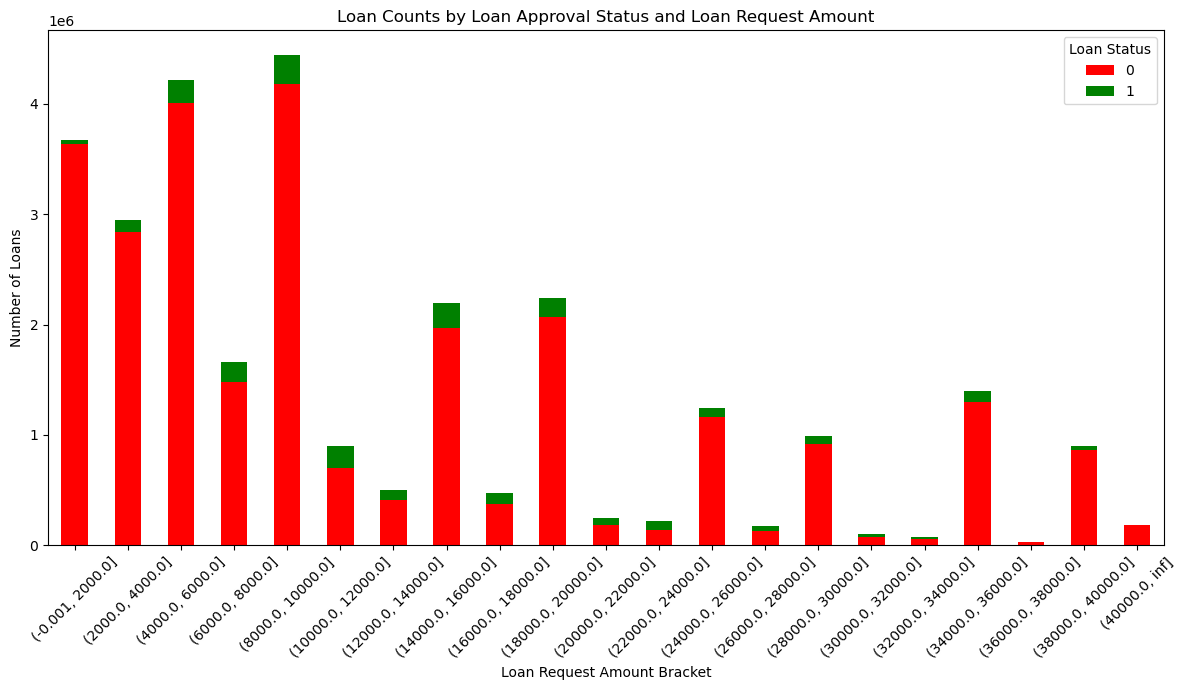

In [333]:
loan_amount_app_grouped = clean_acc_rej_df.groupby(['loan_amount_bracket','app_status']).size().unstack(fill_value=0)


loan_amount_app_grouped.plot(kind='bar', stacked=True, figsize=(12,7), color=['red', 'green'])

plt.title('Loan Counts by Loan Approval Status and Loan Request Amount')
plt.xlabel('Loan Request Amount Bracket')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

Also grouping "dti": 

In [348]:
part2_dti_bins = list(range(0, 105, 5)) + [np.inf] # 0-5%, 5%-10%, up to 100%, then inf
clean_acc_rej_df['dti_group'] = pd.cut(clean_acc_rej_df['dti'], bins=part2_dti_bins, right=True, include_lowest=True) #Make sure to include 0

sorted([x for x in clean_acc_rej_df['dti_group'].unique().tolist() if pd.notnull(x)]) #Avoid error in some -1 DTI ratios 

[Interval(-0.001, 5.0, closed='right'),
 Interval(5.0, 10.0, closed='right'),
 Interval(10.0, 15.0, closed='right'),
 Interval(15.0, 20.0, closed='right'),
 Interval(20.0, 25.0, closed='right'),
 Interval(25.0, 30.0, closed='right'),
 Interval(30.0, 35.0, closed='right'),
 Interval(35.0, 40.0, closed='right'),
 Interval(40.0, 45.0, closed='right'),
 Interval(45.0, 50.0, closed='right'),
 Interval(50.0, 55.0, closed='right'),
 Interval(55.0, 60.0, closed='right'),
 Interval(60.0, 65.0, closed='right'),
 Interval(65.0, 70.0, closed='right'),
 Interval(70.0, 75.0, closed='right'),
 Interval(75.0, 80.0, closed='right'),
 Interval(80.0, 85.0, closed='right'),
 Interval(85.0, 90.0, closed='right'),
 Interval(90.0, 95.0, closed='right'),
 Interval(95.0, 100.0, closed='right'),
 Interval(100.0, inf, closed='right')]

Let's also visualize the relationship between the number of loans in each Debt-To-Income Ratio bracket and their associated loan approval: 

C:\Users\alecp\AppData\Local\Temp\ipykernel_19828\2047292976.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dti_app_grouped = clean_acc_rej_df.groupby(['dti_group','app_status']).size().unstack(fill_value=0)


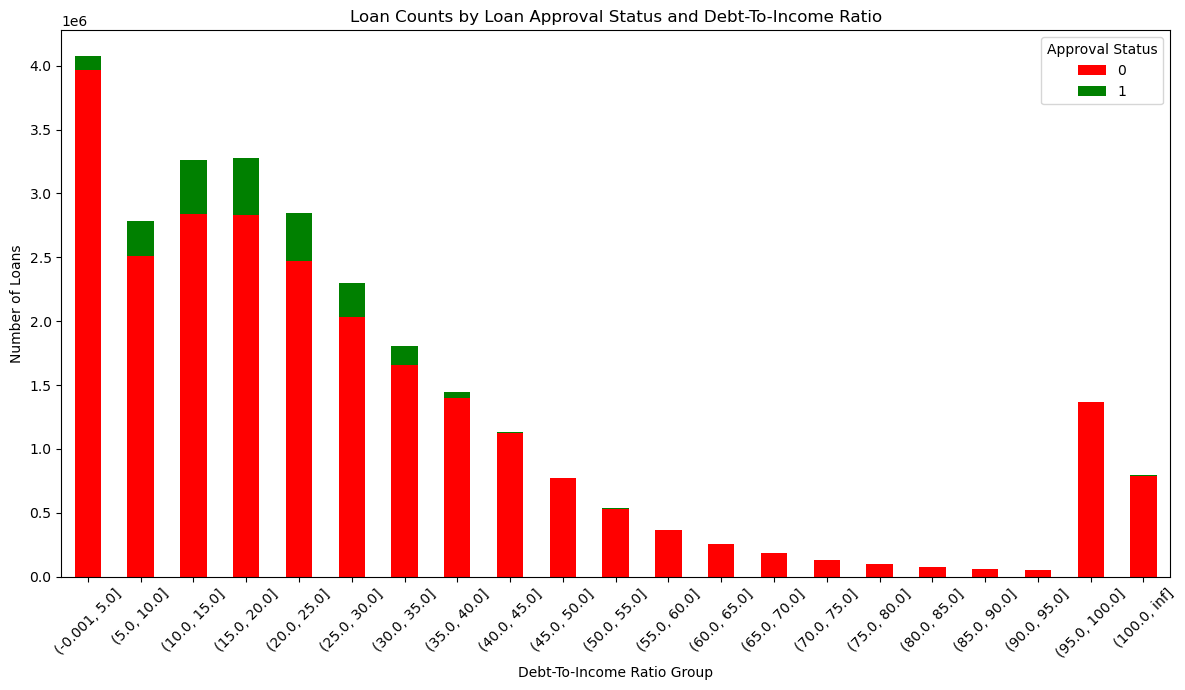

In [351]:
dti_app_grouped = clean_acc_rej_df.groupby(['dti_group','app_status']).size().unstack(fill_value=0)


dti_app_grouped.plot(kind='bar', stacked=True, figsize=(12,7), color=['red', 'green'])

plt.title('Loan Counts by Loan Approval Status and Debt-To-Income Ratio')
plt.xlabel('Debt-To-Income Ratio Group')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')
plt.tight_layout()
plt.show()

Let's also investigate the relationship between the number of loans, employment length, and loan approval:

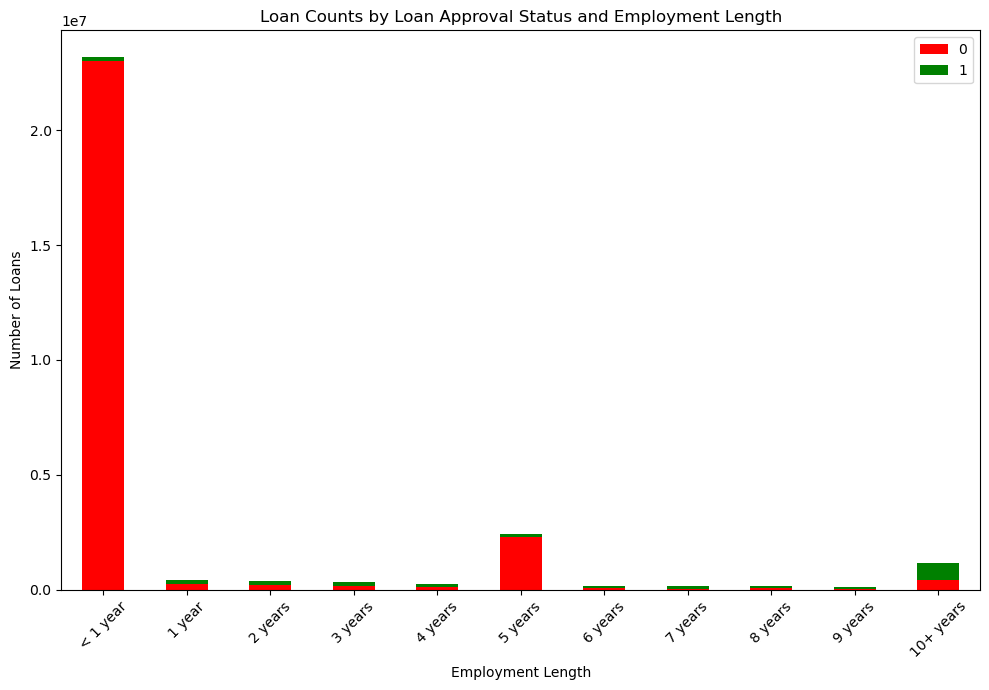

In [354]:
employ_app_grouped = clean_acc_rej_df.groupby(['emp_length','app_status']).size().unstack(fill_value=0)

emp_order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']

employ_app_grouped = employ_app_grouped.reindex(emp_order)


employ_app_grouped.plot(kind='bar', stacked=True, figsize=(10,7), color=['red', 'green'])

plt.title('Loan Counts by Loan Approval Status and Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

Let's also create new columns with emp_length and addr_state as integers. With large conversions like these, let's use "mapping":

Source: GeeksforGeeks. (n.d.). Python – Mapping Key Values to Dictionary. Retrieved from https://www.geeksforgeeks.org/python-mapping-key-values-to-dictionary/

In [357]:
emp_as_int = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}


clean_acc_rej_df['emp_length_int'] = clean_acc_rej_df['emp_length'].map(emp_as_int)

clean_acc_rej_df.head()

,loan_amnt,dti,emp_length,addr_state,app_status,loan_amount_bracket,dti_group,emp_length_int
0,3600.0,5.91,10+ years,PA,1,"(2000.0, 4000.0]","(5.0, 10.0]",10
1,24700.0,16.06,10+ years,SD,1,"(24000.0, 26000.0]","(15.0, 20.0]",10
2,20000.0,10.78,10+ years,IL,1,"(18000.0, 20000.0]","(10.0, 15.0]",10
3,35000.0,17.06,10+ years,NJ,1,"(34000.0, 36000.0]","(15.0, 20.0]",10
4,10400.0,25.37,3 years,PA,1,"(10000.0, 12000.0]","(25.0, 30.0]",3


In [359]:
clean_acc_rej_df["addr_state"].unique() #We have the 50 states, plus DC

array(['PA', 'SD', 'IL', 'NJ', 'GA', 'MN', 'SC', 'RI', 'TX', 'NC', 'CA',
       'VA', 'AZ', 'NY', 'IN', 'MD', 'KS', 'NM', 'AL', 'WA', 'MO', 'OH',
       'LA', 'FL', 'CO', 'MI', 'DC', 'MA', 'WI', 'VT', 'DE', 'TN', 'NH',
       'NE', 'CT', 'OR', 'AR', 'MT', 'NV', 'WV', 'HI', 'OK', 'KY', 'WY',
       'MS', 'UT', 'ND', 'ME', 'AK', 'ID', 'IA'], dtype=object)

In [361]:
state_as_int = {
    'DE': 1, 'PA': 2, 'NJ': 3, 'GA': 4, 'CT': 5, 'MA': 6, 'MD': 7, 'SC': 8, 'NH': 9,
    'VA': 10, 'NY': 11, 'NC': 12, 'RI': 13, 'VT': 14, 'KY': 15, 'TN': 16, 'OH': 17,
    'LA': 18, 'IN': 19, 'MS': 20, 'IL': 21, 'AL': 22, 'ME': 23, 'MO': 24, 'AR': 25,
    'MI': 26, 'FL': 27, 'TX': 28, 'IA': 29, 'WI': 30, 'CA': 31, 'MN': 32, 'OR': 33,
    'KS': 34, 'WV': 35, 'NV': 36, 'NE': 37, 'CO': 38, 'ND': 39, 'SD': 40, 'MT': 41,
    'WA': 42, 'ID': 43, 'WY': 44, 'UT': 45, 'OK': 46, 'NM': 47, 'AZ': 48, 'AK': 49,
    'HI': 50, 'DC': 51
}

clean_acc_rej_df['state_int'] = clean_acc_rej_df['addr_state'].map(state_as_int)

clean_acc_rej_df.head()

,loan_amnt,dti,emp_length,addr_state,app_status,loan_amount_bracket,dti_group,emp_length_int,state_int
0,3600.0,5.91,10+ years,PA,1,"(2000.0, 4000.0]","(5.0, 10.0]",10,2
1,24700.0,16.06,10+ years,SD,1,"(24000.0, 26000.0]","(15.0, 20.0]",10,40
2,20000.0,10.78,10+ years,IL,1,"(18000.0, 20000.0]","(10.0, 15.0]",10,21
3,35000.0,17.06,10+ years,NJ,1,"(34000.0, 36000.0]","(15.0, 20.0]",10,3
4,10400.0,25.37,3 years,PA,1,"(10000.0, 12000.0]","(25.0, 30.0]",3,2


Finally, out of curiosity, let's visualize the relationship between the number of loans, the borrower's provided U.S. State, and loan approval. 

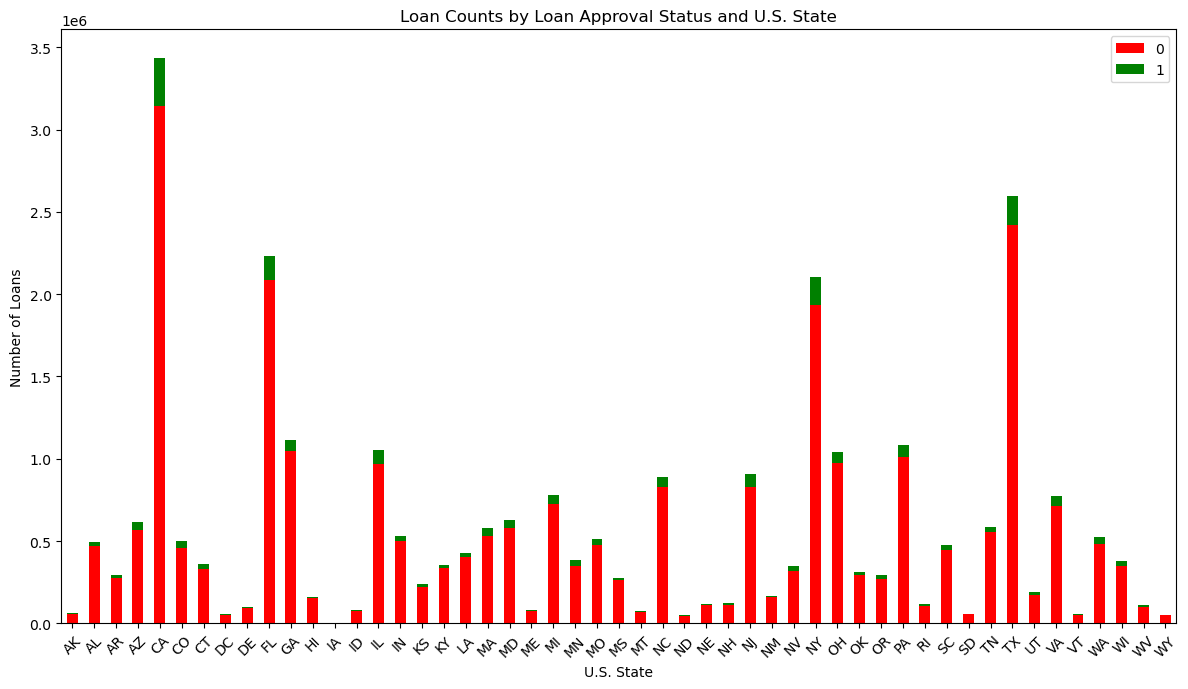

In [364]:
state_app_grouped = clean_acc_rej_df.groupby(['addr_state','app_status']).size().unstack(fill_value=0)


state_app_grouped.plot(kind='bar', stacked=True, figsize=(12,7), color=['red', 'green'])

plt.title('Loan Counts by Loan Approval Status and U.S. State')
plt.xlabel('U.S. State')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### <div style="text-align: center;">Correlation Analysis

In [367]:
clean_acc_rej_df.head()

,loan_amnt,dti,emp_length,addr_state,app_status,loan_amount_bracket,dti_group,emp_length_int,state_int
0,3600.0,5.91,10+ years,PA,1,"(2000.0, 4000.0]","(5.0, 10.0]",10,2
1,24700.0,16.06,10+ years,SD,1,"(24000.0, 26000.0]","(15.0, 20.0]",10,40
2,20000.0,10.78,10+ years,IL,1,"(18000.0, 20000.0]","(10.0, 15.0]",10,21
3,35000.0,17.06,10+ years,NJ,1,"(34000.0, 36000.0]","(15.0, 20.0]",10,3
4,10400.0,25.37,3 years,PA,1,"(10000.0, 12000.0]","(25.0, 30.0]",3,2


With a mixture of categorical variables ("addr_state", "emp_length") and continuous variables ("loan_amnt", "dti"), we will need a correlation model that can use multiple data types. From Part 1, we found that a Pearson Correlation was not a good fit for nonlinear and non-continuous variables. Instead, we found that a Mutual Information Model worked well to measure the general relationship between nonlinear variables.

In order to use this model, we cannot have objects or strings. Converting "emp_length" and "addr_state" to integers will be tedious and unnecessary, as we just need to classify each object (such as 3 years or VT) into an integer. So instead, let's use sklearn's Label Encoding library to also encode our objects. 

Additionally, with nearly 30 million rows, this computation will take a very long time. In order to shorten this process, we can sample out a few million rows, and use those in our model instead. This will give us a great approximation. 


In [370]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

mi2_fields = ['loan_amnt', 'dti', 'emp_length', 'addr_state']


le = LabelEncoder()
X = clean_acc_rej_df[mi2_fields].copy()

for col in ['emp_length', 'addr_state']:
    X[col] = le.fit_transform(X[col])

y = le.fit_transform(clean_acc_rej_df['app_status'])

X = X.reset_index(drop=True) #Aviod indexing error

#SAMPLE
sampled_X = X.sample(n=5000000, random_state=0)
sampled_y = y[sampled_X.index]


mi2_scores = mutual_info_classif(sampled_X, sampled_y, discrete_features=False, random_state=0)


mi2_acc_rej_df = pd.DataFrame({'Feature': mi2_fields, 'Mutual Information': mi2_scores})
mi2_acc_rej_df = mi2_acc_rej_df.sort_values(by='Mutual Information', ascending=False)

mi2_acc_rej_df

# Sampling and LabelEncoder help from: OpenAI. (2025). ChatGPT (GPT-4 model). OpenAI. https://openai.com/chatgpt

,Feature,Mutual Information
2,emp_length,0.288561
0,loan_amnt,0.093968
3,addr_state,0.047154
1,dti,0.029735


C:\Users\alecp\AppData\Local\Temp\ipykernel_19828\3798840013.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mutual Information', y='Feature', data=mi2_acc_rej_df, palette='viridis')


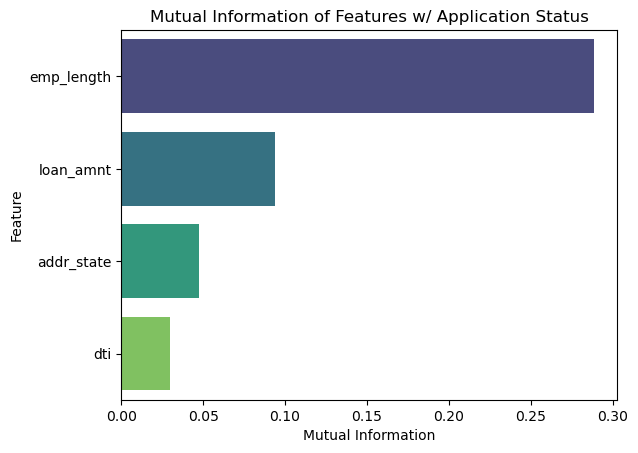

In [372]:
sns.barplot(x='Mutual Information', y='Feature', data=mi2_acc_rej_df, palette='viridis')
plt.title("Mutual Information of Features w/ Application Status")
plt.show()

By this Mutual Information Model, we can see that "emp_length" holds the highest MI score, therefore telling us that the approval or rejection of a loan application is more dependent on an individual's employment duration than on our other features. In other words, the "emp_length" field provides the most information for predicting the status of a loan application. From our exploratory data analysis, we also saw more approved loan applications with individuals who have been employed for 10 years or more, suggesting a positive relationship between employment duration and creditworthiness. 

### <div style="text-align: center;">K-Nearest Neighbor Algorithm Implementation

A K-Nearest Neighbor is a very intuitive classification algorithm that predicts a new data point based on the "k" closest data points. There is no training involved with this method, and it works best with larger amounts of data. Using our rejected and accepted loan data, we will predict the outcome of a new loan application (rejected or accepted) before validating how well the algorithm worked. 

In this model, we will choose the number of closest data points we want to consider, "k". A larger k value will give the model smoother boundaries and decrease the likelihood of overfitting. However, the model will become increasingly computationally expensive, and with too large a k value, will become prone to underfitting by oversimplifying patterns. 

Source: 
- GeeksforGeeks. (n.d.). K-Nearest Neighbours. GeeksforGeeks. https://www.geeksforgeeks.org/k-nearest-neighbours/
- Library usage and algorithm template source: GeeksforGeeks. (n.d.). K-Nearest Neighbor Algorithm in Python. GeeksforGeeks. https://www.geeksforgeeks.org/k-nearest-neighbor-algorithm-in-python/

With nearly 30 million rows, this dataset is much too big for this model. K-Nearest Neighbor is a lazy learner, meaning there is no training, but the distance has to be computed from the new data point to 30,000,000 other points. Therefore, there are 30,000,000 calculations for one prediction, roughly O(30 Million x d). This is incredibly inefficient and expensive. 

To combat this, we have multiple options such as dimensionality reduction (like PCA), other classification algorithms (like Random Forest), or sampling. 

For this model, let's take a stratified sample of our current dataset. 

A stratified sample will randomly sample our dataset, but maintain the proportion of approved and rejected loans. Therefore, we can avoid a skewed sample that would misrepresent our model. 

Library usage and code template source: GeeksforGeeks. (n.d.). How to Implement Stratified Sampling with Scikit-Learn. GeeksforGeeks. https://www.geeksforgeeks.org/how-to-implement-stratified-sampling-with-scikit-learn/

In [379]:
from sklearn.model_selection import train_test_split

# define the sample size
sample_size = 100000 

# Perform stratified sampling to maintain class proportions
sampled_acc_rej_df, _ = train_test_split(clean_acc_rej_df, train_size = sample_size, stratify = clean_acc_rej_df['app_status'], random_state=42)

sampled_acc_rej_df.head()

,loan_amnt,dti,emp_length,addr_state,app_status,loan_amount_bracket,dti_group,emp_length_int,state_int
25531202,28300.0,100.00,< 1 year,PA,0,"(28000.0, 30000.0]","(95.0, 100.0]",0,2
7045016,5000.0,0.86,< 1 year,WA,0,"(4000.0, 6000.0]","(-0.001, 5.0]",0,42
24148658,10000.0,12.99,< 1 year,IL,0,"(8000.0, 10000.0]","(10.0, 15.0]",0,21
19195412,17000.0,100.00,< 1 year,WI,0,"(16000.0, 18000.0]","(95.0, 100.0]",0,30
3934294,3000.0,2.98,< 1 year,CA,0,"(2000.0, 4000.0]","(-0.001, 5.0]",0,31


Let's compare proportions: 

In [382]:
print(sampled_acc_rej_df['app_status'].value_counts(normalize=True))
print(clean_acc_rej_df['app_status'].value_counts(normalize=True))

app_status
0    0.92664
1    0.07336
Name: proportion, dtype: float64
app_status
0    0.926637
1    0.073363
Name: proportion, dtype: float64


Let's rerun our K-Nearest Neighbor model:

Considering testing accuracy, the best k is: 13
With a test accuracy of: 94.75%


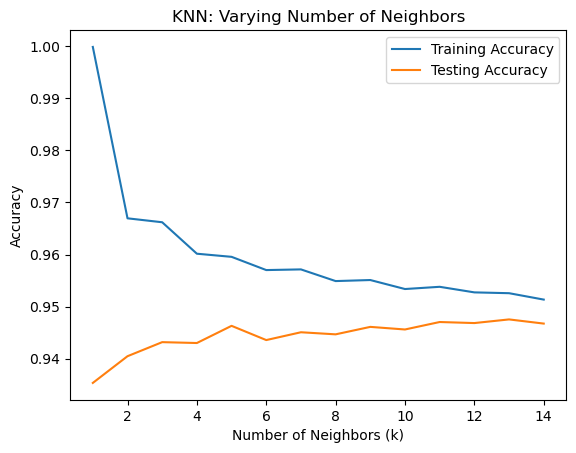

In [385]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

features = ['loan_amnt', 'dti', 'emp_length_int', 'state_int']
X = sampled_acc_rej_df[features]
y = sampled_acc_rej_df['app_status']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

neighbors = np.arange(1, 15)  # Try k values from 1 to 14
train_accuracy = np.empty(len(neighbors)) #Let's store accuracy here
test_accuracy = np.empty(len(neighbors))

# Loop over k values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

best_index = test_accuracy.argmax()
best_k = neighbors[best_index]
best_acc = test_accuracy[best_index]
    
print(f"Considering testing accuracy, the best k is: {best_k}")
print(f"With a test accuracy of: {best_acc * 100:.2f}%")

# Plot
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy (%)')
plt.title('KNN: Varying Number of Neighbors')
plt.legend()
plt.show()

#Library usage and algorithm template source: 
#GeeksforGeeks. (n.d.). K-Nearest Neighbor Algorithm in Python. GeeksforGeeks. https://www.geeksforgeeks.org/k-nearest-neighbor-algorithm-in-python/

Setting our own k value:

In [388]:
k = 6 #Set k val
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)

To validate, we can see: 

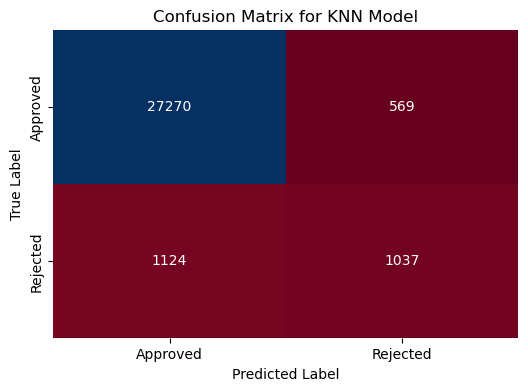

In [391]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdBu', cbar=False, xticklabels=['Approved', 'Rejected'], yticklabels=['Approved', 'Rejected'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for KNN Model')
plt.show()

When using a larger k value in our model, we can see how the accuracy in our training data decreases, due to the reduction of overfitting. At the same time, our testing data accuracy increases as the model better generalizes our unseen data. 

We can also see that our model did a great job of correctly predicting approved loans, but not so well predicting rejected loans. 

Let's add two new loans and see how it does!

An individual is asking for $15,000. They have an 18.5% DTI Ratio, are 5 years employed, and are from NC. 

In [395]:
new_loan1 = np.array([[15000, 18.5, 5, 12]])
new_loan1_scaled = scaler.transform(new_loan1)


prediction1 = knn.predict(new_loan1_scaled)


print(f"Using K = {knn.n_neighbors}")

if prediction1[0] == 1:
    print("Predicted: Approved")
else:
    print("Predicted: Rejected")


Using K = 6
Predicted: Rejected


C:\Users\alecp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


An individual is asking for $100,000. They have an 40% DTI Ratio, are less than 1 year employed, and from VT. 

In [398]:
new_loan2 = np.array([[100000, 40, 0, 14]])

new_loan2_scaled = scaler.transform(new_loan2)


prediction2 = knn.predict(new_loan2_scaled)

print(f"Using K = {knn.n_neighbors}")

if prediction2[0] == 1:
    print("Predicted: Approved")
else:
    print("Predicted: Rejected")

Using K = 6
Predicted: Rejected


C:\Users\alecp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [400]:
y_train.value_counts()

app_status
0    64825
1     5175
Name: count, dtype: int64

It seems we have an imbalance in our training dataset. This is due to our stratified sample and the proportion we maintained from our large dataset, as we have way more rejected loans than accepted.

In [403]:
clean_acc_rej_df['app_status'].value_counts()

app_status
0    26697364
1     2113648
Name: count, dtype: int64

We can perform a balanced sampling technique on our stratified sample to make our model more balanced. This would help our model distinguish between accepted and rejected loans. However, this will disregard our data's real-world proportions and may misrepresent the actual population. 

Let's try a random undersampling of our stratified sample to reduce the majority class (rejected loans). 

Library and code help source: scikit-learn. (n.d.). sklearn.utils.resample. scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html

In [406]:
from sklearn.utils import resample

majority_sampled_acc_rej_df = sampled_acc_rej_df[sampled_acc_rej_df['app_status'] == 0]
minority_sampled_acc_rej_df = sampled_acc_rej_df[sampled_acc_rej_df['app_status'] == 1]

# Downsample majority class to match minority size
majority_downsampled = resample(majority_sampled_acc_rej_df, replace=False, n_samples=len(minority_sampled_acc_rej_df), random_state=42)

# Combine
balanced_sampled_acc_rej_df = pd.concat([minority_sampled_acc_rej_df, majority_downsampled])

# Shuffle (Because why not?)
balanced_sampled_acc_rej_df = balanced_sampled_acc_rej_df.sample(frac=1, random_state=42).reset_index(drop=True)


balanced_sampled_acc_rej_df['app_status'].value_counts()


app_status
0    7336
1    7336
Name: count, dtype: int64

Let's rerun our model to find the best k value: 

Considering testing accuracy, the best k is: 7
With a test accuracy of: 89.37%


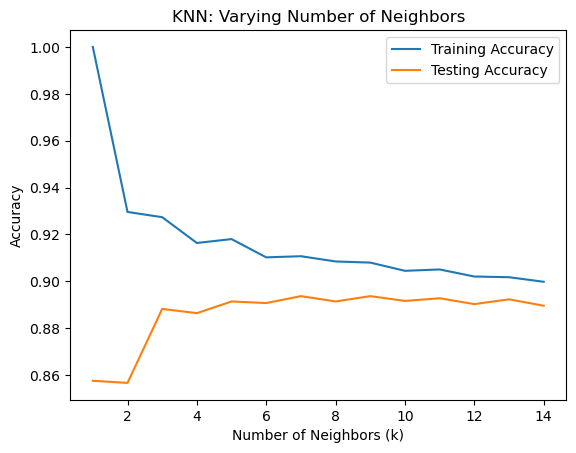

In [409]:
features = ['loan_amnt', 'dti', 'emp_length_int', 'state_int']
X = balanced_sampled_acc_rej_df[features]
y = balanced_sampled_acc_rej_df['app_status']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

neighbors = np.arange(1, 15)  # Try k values from 1 to 14
train_accuracy = np.empty(len(neighbors)) #Let's store accuracy here
test_accuracy = np.empty(len(neighbors))

# Loop over k values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

best_index = test_accuracy.argmax()
best_k = neighbors[best_index]
best_acc = test_accuracy[best_index]
    
print(f"Considering testing accuracy, the best k is: {best_k}")
print(f"With a test accuracy of: {best_acc * 100:.2f}%")

# Plot
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy (%)')
plt.title('KNN: Varying Number of Neighbors')
plt.legend()
plt.show()

Setting our own k value:

In [444]:
k = 5 #Set k val
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

To validate, we can see that: 

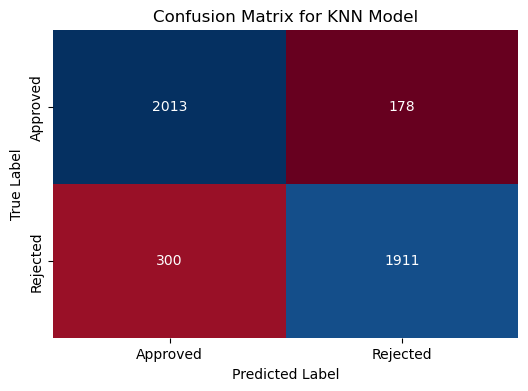

In [447]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdBu', cbar=False, xticklabels=['Approved', 'Rejected'], yticklabels=['Approved', 'Rejected'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for KNN Model')
plt.show()

Let's retry our two loan applications: 

An individual is asking for $15,000. They have an 18.5% DTI Ratio, are 5 years employed, and is from NC. 

In [450]:
new_loan1 = np.array([[15000, 18.5, 5, 12]])
new_loan1_scaled = scaler.transform(new_loan1)


prediction1 = knn.predict(new_loan1_scaled)


print(f"Using K = {knn.n_neighbors}")

if prediction1[0] == 1:
    print("Predicted: Approved")
else:
    print("Predicted: Rejected")


Using K = 5
Predicted: Rejected


C:\Users\alecp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


An individual is asking for $100,000. They have an 40% DTI Ratio, are less than 1 year employed, and from VT. 

In [453]:
new_loan2 = np.array([[100000, 40, 0, 14]])

new_loan2_scaled = scaler.transform(new_loan2)


prediction2 = knn.predict(new_loan2_scaled)

print(f"Using K = {knn.n_neighbors}")

if prediction2[0] == 1:
    print("Predicted: Approved")
else:
    print("Predicted: Rejected")

Using K = 5
Predicted: Rejected


C:\Users\alecp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


This looks much better! At the cost of a lower testing accuracy, our model has equal proportions of loan application rejections and acceptances. Although this misrepresents the true distribution of application approvals, our model better describes the risk associated with new loans. 

### <div style="text-align: center;"> K-Fold Cross Validation 

Although we already validated our model using testing accuracies and a confusion matrix for both our stratified sample and our balanced stratified sample, it's best practice to also consider a K-Fold Cross Validation. 

Like in Part 1, let's perform a K-Fold Cross Validation on our K-Nearest Neighbor model. We will use our balanced stratified sample. 

By using the sklearn library once again, we can efficiently analyze this: 

Library help and code template source: 

scikit-learn. (n.d.). Cross-validation: evaluating estimator performance. scikit-learn. https://scikit-learn.org/stable/modules/cross_validation.html

Cross-validated accuracy scores for each fold: [90.22146508 89.06303237 89.50238582 89.0593047  88.82072256]
Average cross-validation accuracy: 89.3334%


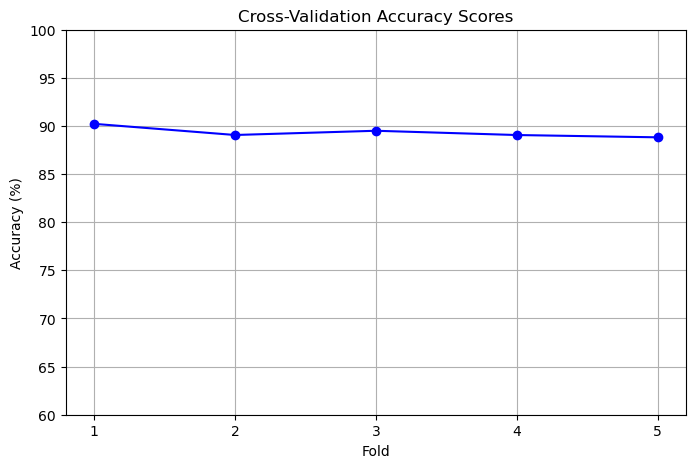

In [458]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy') * 100

print(f"Cross-validated accuracy scores for each fold: {cv_scores}")
print(f"Average cross-validation accuracy: {cv_scores.mean():.4f}%")

plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='-', color='blue')
plt.title('Cross-Validation Accuracy Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy (%)')
plt.ylim([60, 100])
plt.xticks(range(1, 6))
plt.grid(True)
plt.show()

### <div style="text-align: center;">Part 2: Summary 

In this portion of the study, we were able to perform a K-Nearest Neighbor (KNN) model to predict the status of a pending loan application. Using accepted and rejected loan datasets, we were able to determine features that were heavily associated with the creditworthiness of an individual. Keeping in mind the 5 C's of credit, we chose features that were associated with the creditworthiness of an individual, such as Debt-To-Income Ratio and employment. Using these indicators, a K-Nearest Neighbor model was a logical way to predict the creditworthiness and associated risk of an individual, thus, whether a loan application will be approved or declined. 

From our model, we were able to classify which features were associated more heavily with approved or rejected loans. Due to the proportion imbalance of accepted loans to rejected loans, our model favored loan rejection. This led to more false rejections. By performing a balanced sampling technique on our stratified sample of loan data, we were able to reduce the majority class and create equal proportions in our data. However, this slightly reduced the testing accuracy and misrepresented the actual population. Despite this, it allowed our KNN model to better learn patterns associated with approved and rejected loan applications. This made the model more fair and insightful when assessing a new loan. 

When using this model, we were able to pick a "k" value, or the number of nearest data points to consider when inserting a new data point. We were able to test multiple k values while evaluating the model's performance. We were then able to select an optimal k value based on the associated highest testing accuracy. Finally, we validated this further with a K-Fold Cross Validation model. 

Overall, our K-Nearest Neighbor model did a great job assessing the creditworthiness and risk associated with an individual. However, due to the size of the data and unequal proportions, KNN struggled to represent the real-world class distribution. Despite this, our KNN model still provided meaningful results in credit risk prediction. 

## <div style="text-align: center;">Conclusion 

In this case study, we were able to analyze LendingClub's accepted and rejected loans ranging from 2007 to 2018. LendingClub is a financial service company specializing in personal loans, business loans, and loan refinancing. A key part of LendingClub's business model is credit risk analysis and underwriting. Through two classification models, we were able to develop a basic understanding of this process and the key factors that go into creditworthiness. 

Both the rejected and accepted loan datasets contained a variety of data types, such as strings, ints, and objects. Additionally, almost every field had some amount of missing data. Before any machine learning implementation, a large portion of this project was exploring, scrubbing, and understanding the data. With these specific datasets, understanding the definitions, the implications, and the importance of each variable was key in understanding which variables to use in computing our models and analyzing our results. For example, following the 5 C's of credit determined the usage of the Credit Utilization Ratio, a percentage I was not familiar with before understanding my data. 

In Part 1, a Naïve Bayes Classification model was able to effectively calculate joint probabilities and numerical percentages of risk associated with a given loan. The accepted loan dataset was used, and the status of the loan was the target variable. Once each variable was hand-picked, a base-level exploratory data analysis and correlation analyses were performed. Throughout these processes, many challenges arose, one being how large certain pieces of data were. For example, some percentages were labeled as 10%, others as 0.105385729. To combat this, the idea of grouping was introduced, and I was able to group many of the continuous variables, allowing me to analyze and display results more properly. Variables were grouped and visualized in stacked bar charts to investigate any positive or negative relationships between our fields. When performing correlation analyses, I tried multiple techniques such as a Pearson Correlation and a Mutual Information model. As our data was not linearly described and contained both continuous and categorical variables, only the Mutual Information model displayed any interesting results. 

Throughout the implementation of the Naïve Bayes Classification model, each feature probability was computed within a given variable. Every possible combination was computed, which proved to be especially challenging. When working with a large dataset, efficiently computing results was a major problem in this case study. With 7 features, there were about 56 million possible combinations for us to calculate and sort. Being an impossible task, the utilization of a lazy learner became useful. I was able to compute each probability, but only store the necessary data, drastically improving the computation cost (although this still took several hours). The model was then validated with a K-Fold Cross Validation model, and I was able to compute and visualize the accuracies of each fold. 

In Part 2, a K-Nearest Neighbor model was able to effectively predict the status of a loan application. The accepted and rejected loan datasets were used, and the status of the loan application was the target variable. As this data was already separated, it was simple to assign a numerical value to each row, indicating the status of the application. Like in Part 1, each variable was hand-picked and determined through the 5 C's of credit. However, with not many variables in the rejected loan dataset, there were not many to choose from. Once the variables were picked, they had to be matched up with the variables in the accepted loan dataset. This involved renaming and logically matching the definitions of each variable. The datasets were then combined and cleaned of null values. Like in Part 1, continuous variables were grouped, and an exploratory data analysis and correlation analyses were performed to investigate any positive or negative relationships between the variables. 

Throughout the implementation of the K-Nearest Neighbor model, the size of the combined dataset proved to be a major challenge (about 30,000,000 observations). To combat this, I took a stratified sample of the dataset in order to maintain the proportion of states (accepted or rejected) and shrink the dataset we used. By taking a stratified sample, I kept a proper representation of the population. However, the K-Nearest Neighbor model did not perform well with the stratified sample, as the data was heavily imbalanced. At the cost of misrepresenting the actual population, a balanced sampling technique was performed on top of the stratified sample. This reduced the majority class (rejected loans), thus balancing out the dataset. With an additional cost of a slightly decreased testing accuracy, the K-Nearest Neighbor model yielded much better results with the balanced stratified sample, allowing it to better describe the risk associated with a new loan. This model was then validated with a K-Fold Cross Validation model. 

In conclusion, charged-off and defaulted LendingClub loans were classified using a Naïve Bayes Classification model. Furthermore, accepted and rejected LendingClub loan applications were classified using a K-Nearest Neighbor model. Both of these models evaluated the creditworthiness of individuals by utilizing a basic level of credit risk analysis and underwriting. The interpretation and analysis of each dataset's variables proved to be a major challenge in this case study. Additionally, working with datasets of this size and vastness triggered many other smaller challenges, which introduced new ideas such as lazy evaluation and sampling. This case study allowed me to develop a basic understanding of credit analysis, financial risk analysis, and many useful statistical methods. I was able to explore real-world industrial applications within machine learning, and gain exposure to various problems in the field of data science. 


## <div style="text-align: center;"> Sources

Data source from Nathan George, 2019: https://www.kaggle.com/datasets/wordsforthewise/lending-club?select=accepted_2007_to_2018Q4.csv.gz
- LendingClub. “Personal Loan.” LendingClub. https://www.lendingclub.com/personal-loan
- Airtel. (2024, June 25). How does loan grading work? Process, factors, significance & challenges. https://www.airtel.in/blog/personal-loan/how-does-loan-grading-work/
- Capital One. (n.d.). What are the 5 C’s of credit? Capital One. https://www.capitalone.com/learn-grow/money-management/five-cs-of-credit/
- Czinkota, A. / Investopedia. (n.d.). Credit Score Factors Illustration [Image]. Investopedia. https://www.investopedia.com/thmb/sW2OzUcIrqFeZNVNOPuiJ_PwlBw=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/investopedia5cscredit-5c8ffbb846e0fb00016ee129.jpg
- LendingClub. (n.d.). About income verification. LendingClub. https://www.lendingclub.com/public/income-verification.action
- GeeksforGeeks. (n.d.). Python | Pandas DataFrame.corr(). GeeksforGeeks. https://www.geeksforgeeks.org/python-pandas-dataframe-corr/
- ScienceDirect. (n.d.). Pearson correlation. In ScienceDirect Topics. https://www.sciencedirect.com/topics/computer-science/pearson-correlation
- Bobbitt, Z. (2020, July 24). How to Calculate Point-Biserial Correlation in Python. Statology. https://www.statology.org/point-biserial-correlation-python/
- TrainInData. (2021, June 7). Mutual Information with Python. TrainInData. https://www.blog.trainindata.com/mutual-information-with-python/
- GeeksforGeeks. (n.d.). Naive Bayes Classifiers. GeeksforGeeks. https://www.geeksforgeeks.org/naive-bayes-classifiers/
- GeeksforGeeks. (n.d.). Scala Lazy Evaluation. GeeksforGeeks. https://www.geeksforgeeks.org/scala-lazy-evaluation/
- Lakshmipathi, C. (n.d.). A Deep Dive: Naïve Bayes Classifier and K-Fold Cross Validation. Medium. https://chiraglakshmipathi.medium.com/a-deep-dive-na%C3%AFve-bayes-classifier-and-k-fold-cross-validation-d9fe179ffd76
- GeeksforGeeks. (n.d.). Python – Mapping Key Values to Dictionary. Retrieved from https://www.geeksforgeeks.org/python-mapping-key-values-to-dictionary/
- GeeksforGeeks. (n.d.). K-Nearest Neighbours. GeeksforGeeks. https://www.geeksforgeeks.org/k-nearest-neighbours/
- GeeksforGeeks. (n.d.). K-Nearest Neighbor Algorithm in Python. GeeksforGeeks. https://www.geeksforgeeks.org/k-nearest-neighbor-algorithm-in-python/
- GeeksforGeeks. (n.d.). How to Implement Stratified Sampling with Scikit-Learn. GeeksforGeeks. https://www.geeksforgeeks.org/how-to-implement-stratified-sampling-with-scikit-learn/
- scikit-learn. (n.d.). sklearn.utils.resample. scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html
- scikit-learn. (n.d.). Cross-validation: evaluating estimator performance. scikit-learn. https://scikit-learn.org/stable/modules/cross_validation.html
- OpenAI. (2025). ChatGPT (GPT-4 model). OpenAI. https://openai.com/chatgpt